In [103]:
##importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from xgboost import XGBRFClassifier, XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

### Read Data

In [2]:
##Reading training csv
df = pd.read_csv('train.csv')
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [3]:
##Finding shape
df.shape

(69999, 172)

In [4]:
##printing dtype
print(df.dtypes[:60], df.dtypes[60:120], df.dtypes[120:])

id                        int64
circle_id                 int64
loc_og_t2o_mou          float64
std_og_t2o_mou          float64
loc_ic_t2o_mou          float64
last_date_of_month_6     object
last_date_of_month_7     object
last_date_of_month_8     object
arpu_6                  float64
arpu_7                  float64
arpu_8                  float64
onnet_mou_6             float64
onnet_mou_7             float64
onnet_mou_8             float64
offnet_mou_6            float64
offnet_mou_7            float64
offnet_mou_8            float64
roam_ic_mou_6           float64
roam_ic_mou_7           float64
roam_ic_mou_8           float64
roam_og_mou_6           float64
roam_og_mou_7           float64
roam_og_mou_8           float64
loc_og_t2t_mou_6        float64
loc_og_t2t_mou_7        float64
loc_og_t2t_mou_8        float64
loc_og_t2m_mou_6        float64
loc_og_t2m_mou_7        float64
loc_og_t2m_mou_8        float64
loc_og_t2f_mou_6        float64
loc_og_t2f_mou_7        float64
loc_og_t

### Remove columns having more than 70% null values

In [5]:
columns_70 = []
for col in df.columns:
    print(col, '<--------->', df[col].isna().sum(),'<--------->', round((df[col].isna().sum()/69999)*100,2))
    if round((df[col].isna().sum()/69999)*100,2) < 70:
        columns_70.append(col)
df = df[columns_70]

id <---------> 0 <---------> 0.0
circle_id <---------> 0 <---------> 0.0
loc_og_t2o_mou <---------> 702 <---------> 1.0
std_og_t2o_mou <---------> 702 <---------> 1.0
loc_ic_t2o_mou <---------> 702 <---------> 1.0
last_date_of_month_6 <---------> 0 <---------> 0.0
last_date_of_month_7 <---------> 399 <---------> 0.57
last_date_of_month_8 <---------> 733 <---------> 1.05
arpu_6 <---------> 0 <---------> 0.0
arpu_7 <---------> 0 <---------> 0.0
arpu_8 <---------> 0 <---------> 0.0
onnet_mou_6 <---------> 2768 <---------> 3.95
onnet_mou_7 <---------> 2687 <---------> 3.84
onnet_mou_8 <---------> 3703 <---------> 5.29
offnet_mou_6 <---------> 2768 <---------> 3.95
offnet_mou_7 <---------> 2687 <---------> 3.84
offnet_mou_8 <---------> 3703 <---------> 5.29
roam_ic_mou_6 <---------> 2768 <---------> 3.95
roam_ic_mou_7 <---------> 2687 <---------> 3.84
roam_ic_mou_8 <---------> 3703 <---------> 5.29
roam_og_mou_6 <---------> 2768 <---------> 3.95
roam_og_mou_7 <---------> 2687 <---------> 3.

### Null Value Treatment

In [6]:
#Check columns with null values
for col in df.columns:
    if round((df[col].isna().sum()/69999)*100,2) > 0:
        print(col, '<--------->', df[col].isna().sum(),'<--------->', round((df[col].isna().sum()/69999)*100,2),'%')

loc_og_t2o_mou <---------> 702 <---------> 1.0 %
std_og_t2o_mou <---------> 702 <---------> 1.0 %
loc_ic_t2o_mou <---------> 702 <---------> 1.0 %
last_date_of_month_7 <---------> 399 <---------> 0.57 %
last_date_of_month_8 <---------> 733 <---------> 1.05 %
onnet_mou_6 <---------> 2768 <---------> 3.95 %
onnet_mou_7 <---------> 2687 <---------> 3.84 %
onnet_mou_8 <---------> 3703 <---------> 5.29 %
offnet_mou_6 <---------> 2768 <---------> 3.95 %
offnet_mou_7 <---------> 2687 <---------> 3.84 %
offnet_mou_8 <---------> 3703 <---------> 5.29 %
roam_ic_mou_6 <---------> 2768 <---------> 3.95 %
roam_ic_mou_7 <---------> 2687 <---------> 3.84 %
roam_ic_mou_8 <---------> 3703 <---------> 5.29 %
roam_og_mou_6 <---------> 2768 <---------> 3.95 %
roam_og_mou_7 <---------> 2687 <---------> 3.84 %
roam_og_mou_8 <---------> 3703 <---------> 5.29 %
loc_og_t2t_mou_6 <---------> 2768 <---------> 3.95 %
loc_og_t2t_mou_7 <---------> 2687 <---------> 3.84 %
loc_og_t2t_mou_8 <---------> 3703 <---------

In [7]:
# Delete Date columns
date_col = []
for col in df.columns:
    if 'date' in col:
        date_col.append(col)
df.drop(columns=date_col, inplace=True)

In [8]:
#Fill MOU and other outgoing, incoming call null values with 0
df.fillna(0, inplace=True)

In [9]:
##Finding nan sum
df.isna().sum()

id                   0
circle_id            0
loc_og_t2o_mou       0
std_og_t2o_mou       0
loc_ic_t2o_mou       0
                    ..
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
churn_probability    0
Length: 136, dtype: int64

### Feature Engineering

In [10]:
#find all the month columns
month_col = []
distinct_features = []
for col in df.columns:
    if '6' in col or '7' in col or '8' in col:
        month_col.append(col)
        col = col.split('_')[:-1]
        col = '_'.join(col)
        distinct_features.append(col)
        
df[month_col]

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,...,0,0,0,0,0,0,0,0,0,0
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,...,0,0,0,0,0,1,0,0,0,0
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,...,0,0,0,0,0,0,0,0,0,0
4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,...,0,7,6,6,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,15.760,410.924,329.136,0.00,7.36,10.93,0.00,488.46,381.64,14.96,...,0,0,6,1,0,0,0,0,1,0
69995,160.083,289.129,265.772,116.54,196.46,232.63,49.53,96.28,48.06,0.00,...,0,0,0,0,0,0,0,0,0,0
69996,372.088,258.374,279.782,77.13,68.44,78.44,335.54,227.94,263.84,0.00,...,0,0,0,0,0,0,0,0,0,0
69997,238.575,245.414,145.062,14.01,7.64,6.71,30.34,16.68,12.56,25.06,...,0,0,0,0,1,1,1,0,0,0


In [11]:
df.shape

(69999, 136)

In [12]:
# Find the avg and difference for all these columns
for feature in set(distinct_features):
    df[feature+'_avg'] = (df[feature+'_6'] + df[feature+'_7'])/2
    df[feature+'_diff'] = df[feature+'_avg'] - df[feature+'_8']
    df.drop(columns=[feature+'_6', feature+'_7', feature+'_8'], inplace=True)

In [13]:
df['vbc_3g_avg'] = df['jun_vbc_3g'] + df['jul_vbc_3g']
df['vbc_3g_avg'] = df['vbc_3g_avg']/2
df['vbc_3g_diff'] = df['vbc_3g_avg'] - df['aug_vbc_3g']
df.drop(columns=['aug_vbc_3g', 'jun_vbc_3g', 'jul_vbc_3g'], inplace=True)

In [359]:
df.shape

(34217, 85)

In [14]:
df.iloc[:, 10:].head()

,arpu_diff,std_og_t2c_mou_avg,std_og_t2c_mou_diff,std_og_t2f_mou_avg,std_og_t2f_mou_diff,last_day_rch_amt_avg,last_day_rch_amt_diff,isd_og_mou_avg,isd_og_mou_diff,std_ic_t2f_mou_avg,...,loc_og_t2c_mou_avg,loc_og_t2c_mou_diff,roam_og_mou_avg,roam_og_mou_diff,loc_og_mou_avg,loc_og_mou_diff,spl_og_mou_avg,spl_og_mou_diff,vbc_3g_avg,vbc_3g_diff
0,51.6160,0.0,0.0,0.00,0.00,65.0,65.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,11.785,9.175,4.415,4.415,0.0,0.0
1,18.4405,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,11.005,-18.785,0.000,0.000,0.000,0.000,15.365,-16.295,0.0,0.0
2,81.9910,0.0,0.0,0.00,0.00,60.0,60.0,0.0,0.0,0.0,...,1.070,1.070,0.000,0.000,18.810,18.810,2.135,2.135,0.0,0.0
3,69.7160,0.0,0.0,0.28,0.28,110.0,60.0,0.0,0.0,0.0,...,0.000,-8.030,0.000,-1.630,46.875,23.245,12.040,-13.570,0.0,0.0
4,82.8845,0.0,0.0,0.00,0.00,17.5,-12.5,0.0,0.0,0.0,...,4.925,4.925,7.865,7.865,42.425,26.665,8.500,8.500,0.0,0.0


### EDA

#### Univariate

###### Delete the columns with 0 variance

id std: 20207.11508355411
circle_id std: 0.0
loc_og_t2o_mou std: 0.0
std_og_t2o_mou std: 0.0
loc_ic_t2o_mou std: 0.0
aon std: 952.426320924281
churn_probability std: 0.30250203588069513
loc_ic_t2t_mou_avg std: 132.9801258022271
loc_ic_t2t_mou_diff std: 90.15434126736353
arpu_avg std: 316.81326453057466
arpu_diff std: 231.8590693878009
std_og_t2c_mou_avg std: 0.0
std_og_t2c_mou_diff std: 0.0
std_og_t2f_mou_avg std: 7.326342508951085
std_og_t2f_mou_diff std: 5.527659733163842
last_day_rch_amt_avg std: 78.7686296268481
last_day_rch_amt_diff std: 101.24284740347952
isd_og_mou_avg std: 28.4232921442388
isd_og_mou_diff std: 8.931969854804441
std_ic_t2f_mou_avg std: 14.869783706557296
std_ic_t2f_mou_diff std: 10.677614828936555
total_ic_mou_avg std: 277.330227382886
total_ic_mou_diff std: 182.15425636595023
std_og_t2m_mou_avg std: 238.6088275996017
std_og_t2m_mou_diff std: 201.99654437672493
loc_ic_mou_avg std: 237.79639670812696
loc_ic_mou_diff std: 149.74755457066755
isd_ic_mou_avg std: 57.

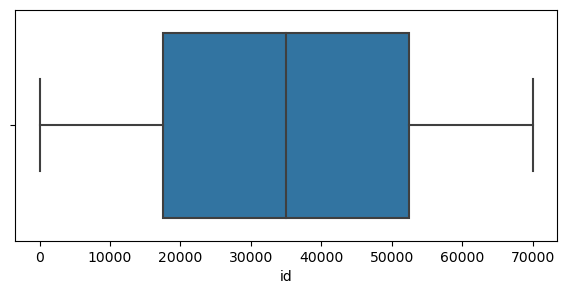

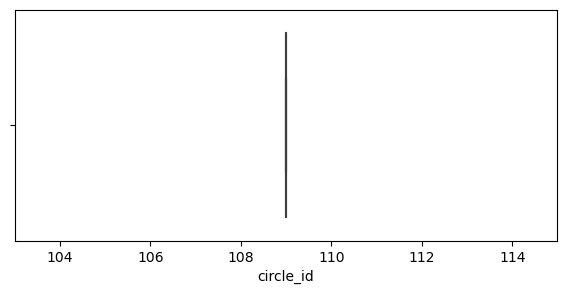

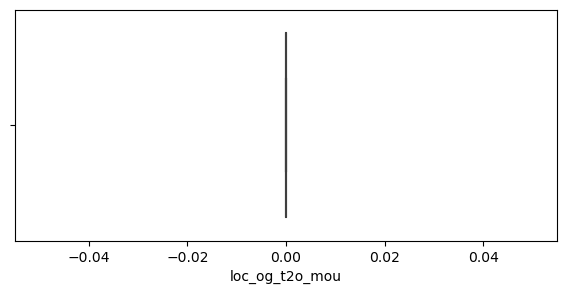

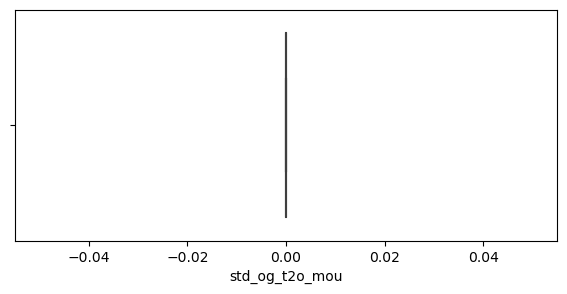

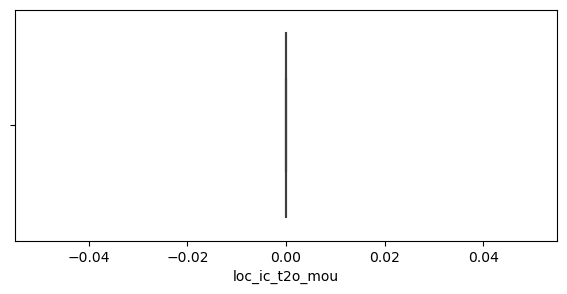

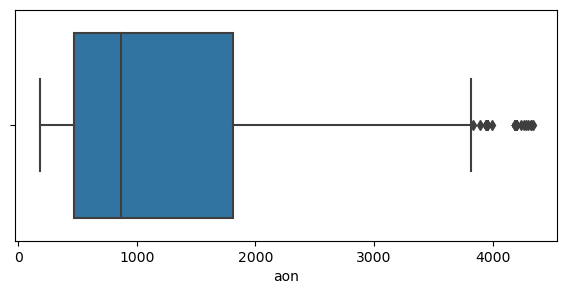

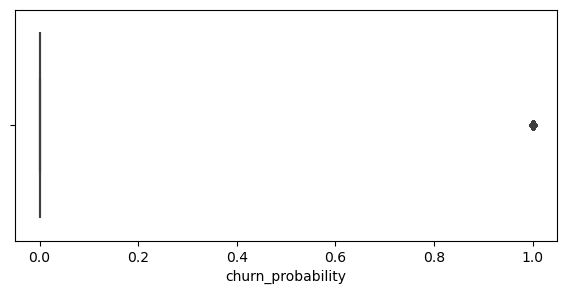

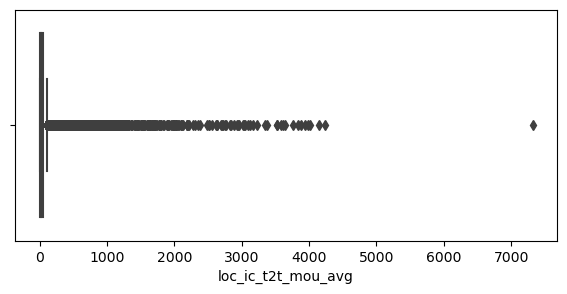

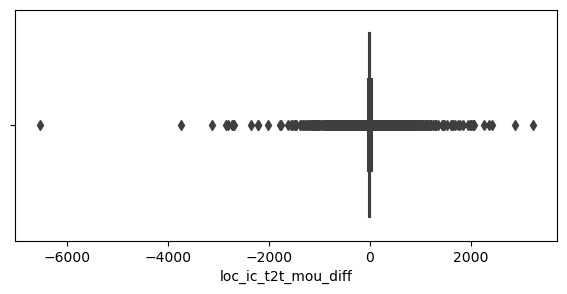

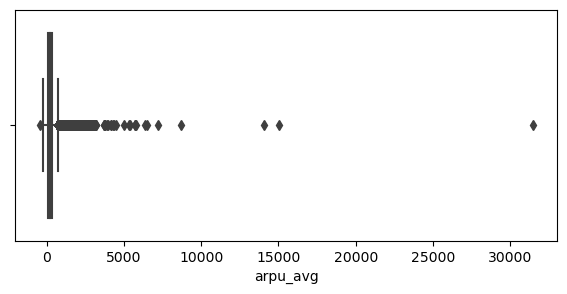

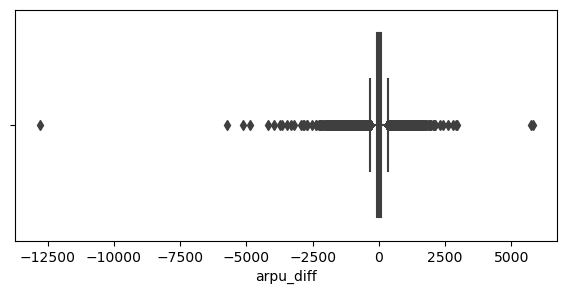

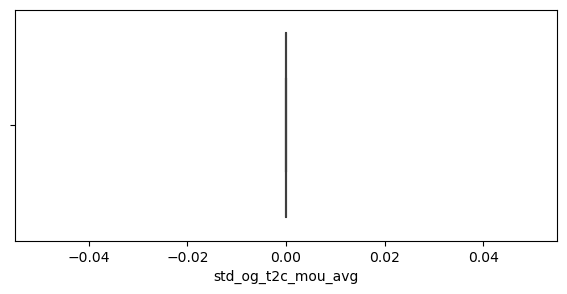

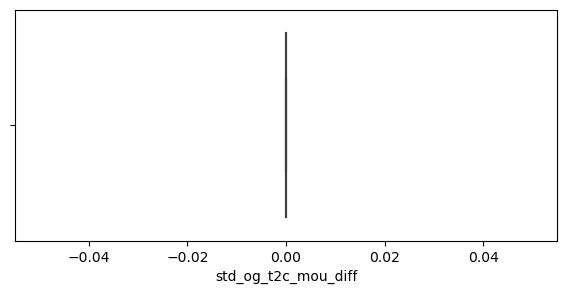

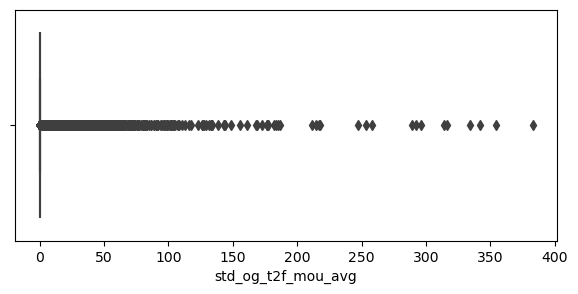

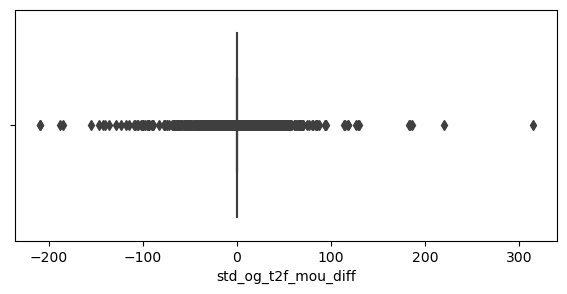

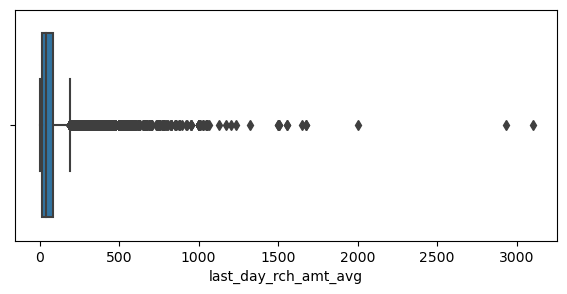

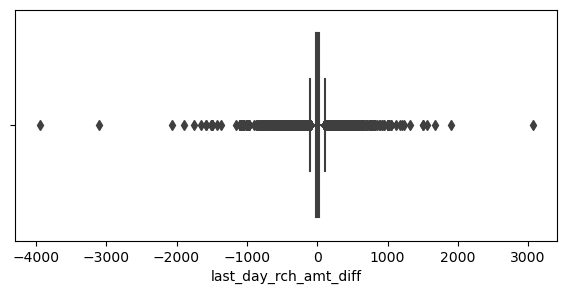

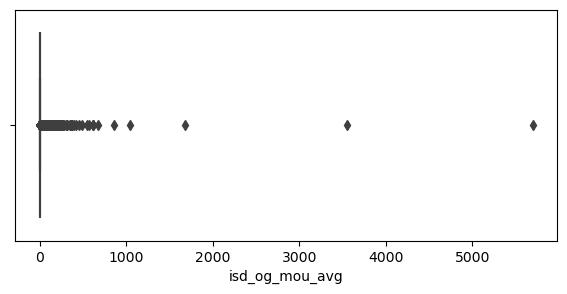

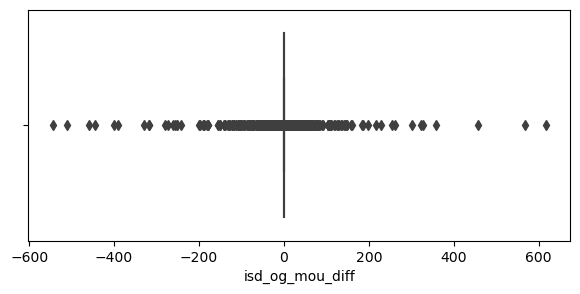

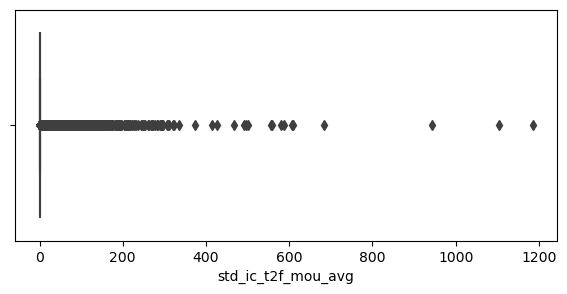

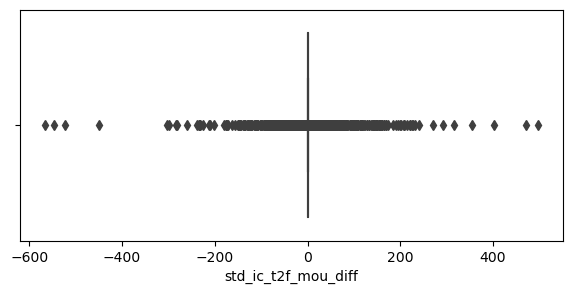

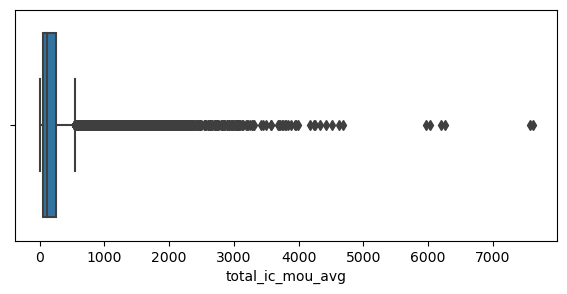

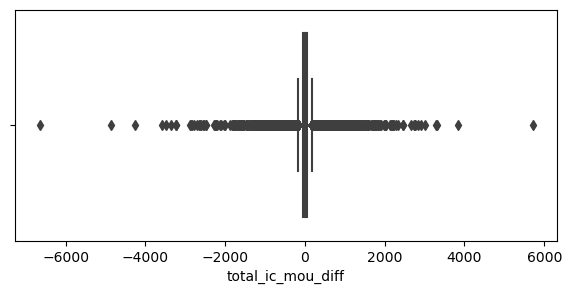

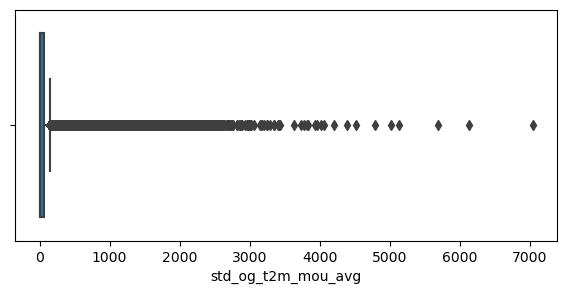

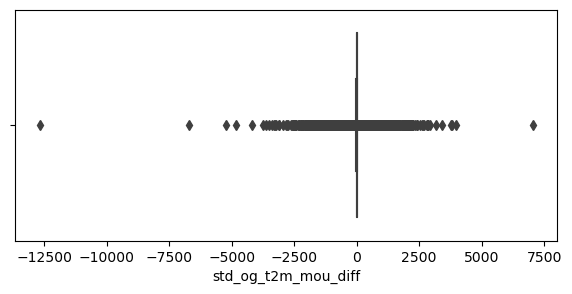

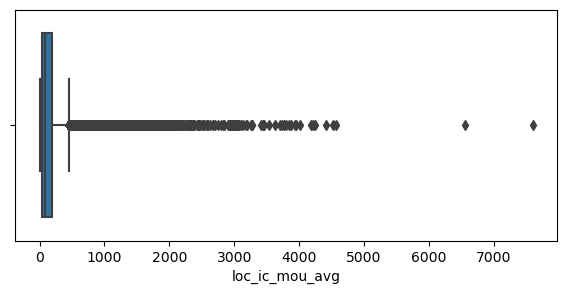

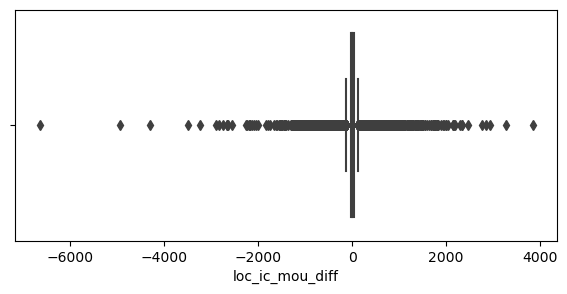

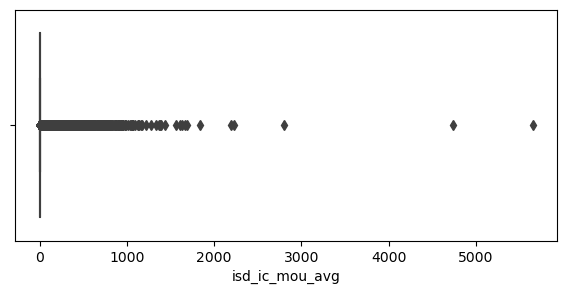

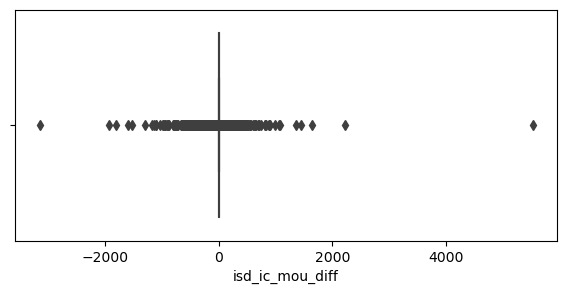

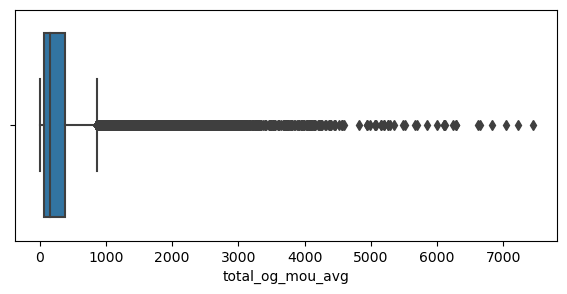

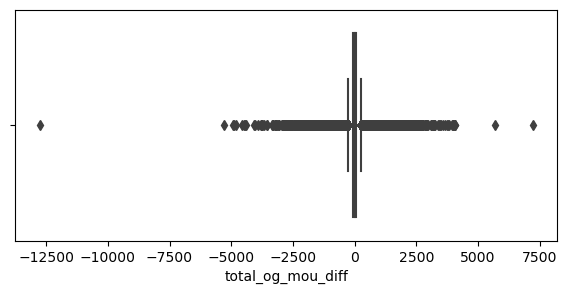

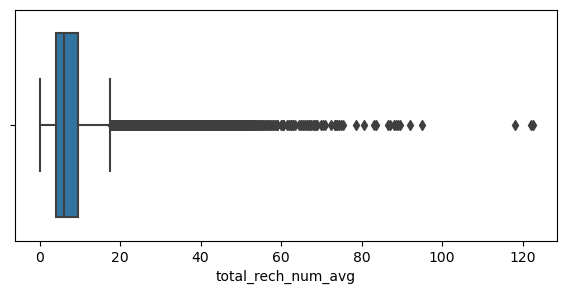

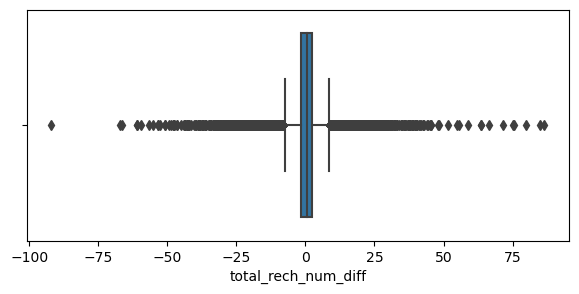

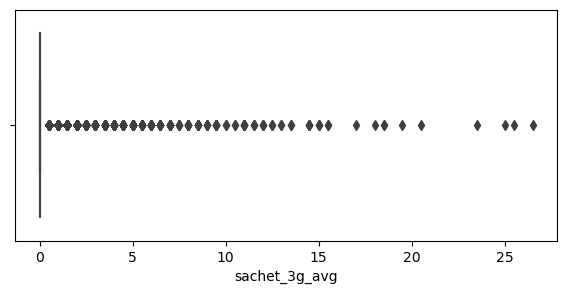

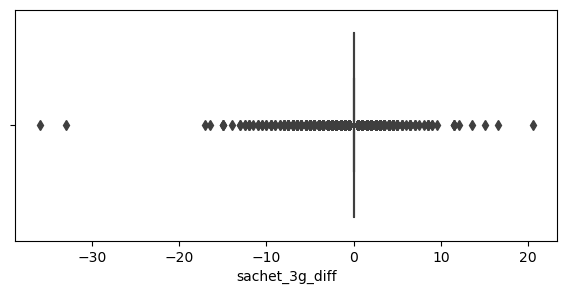

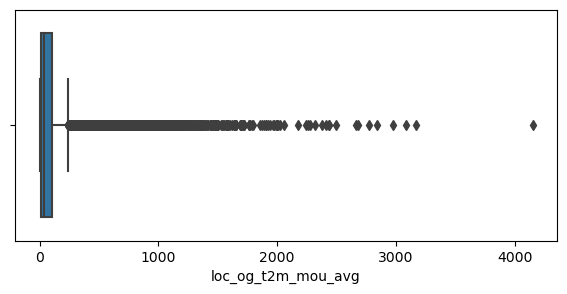

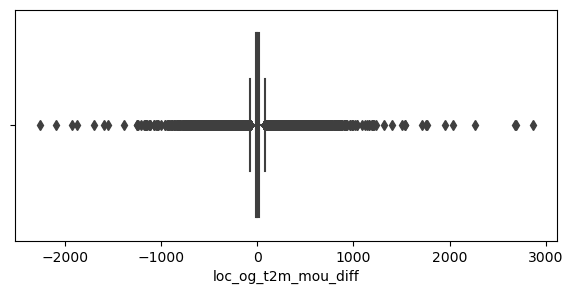

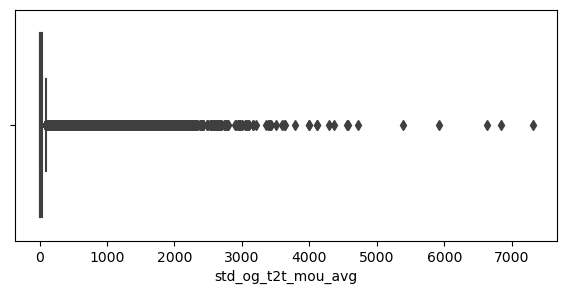

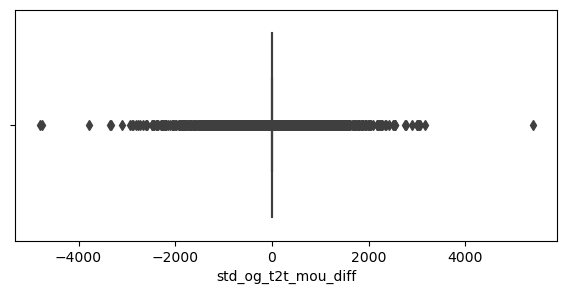

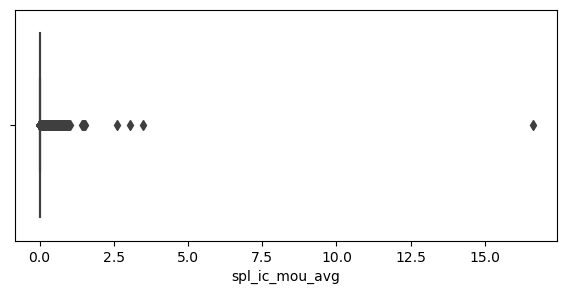

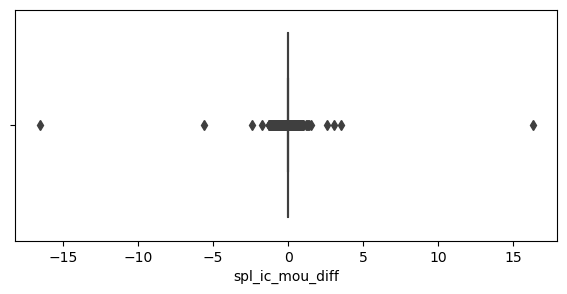

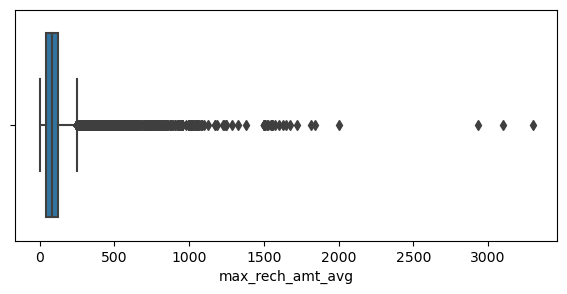

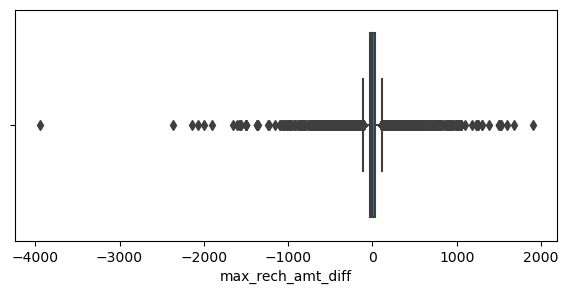

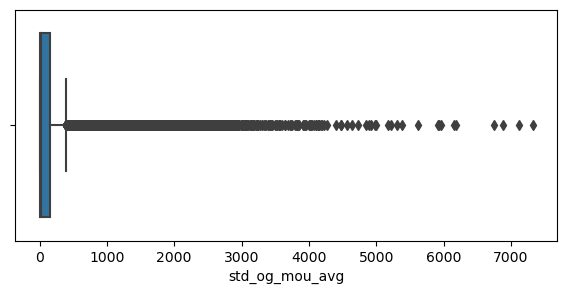

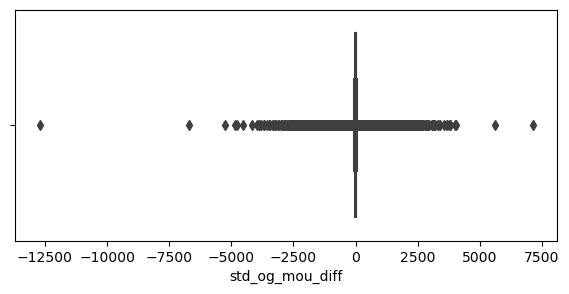

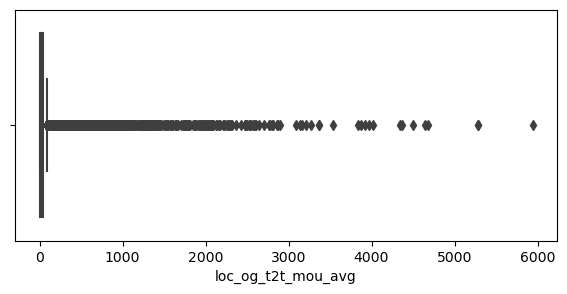

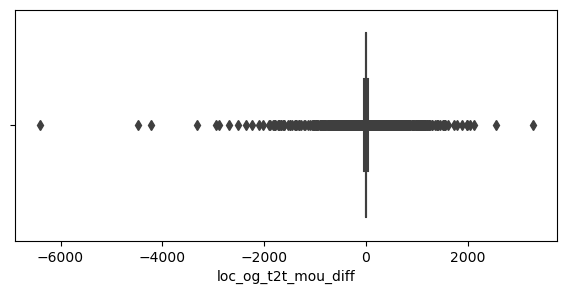

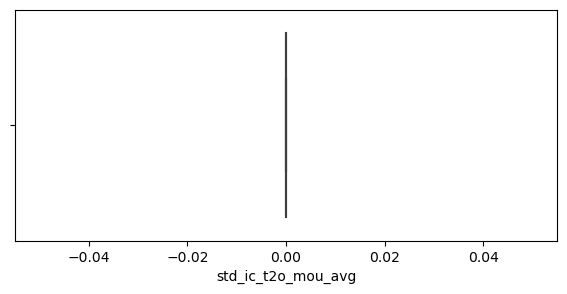

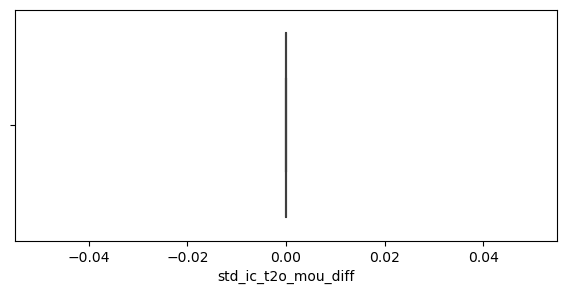

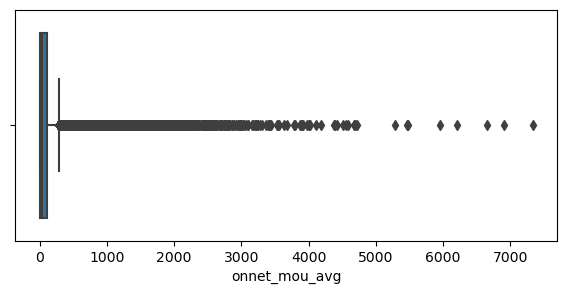

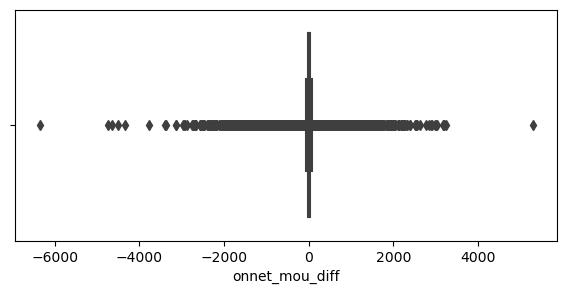

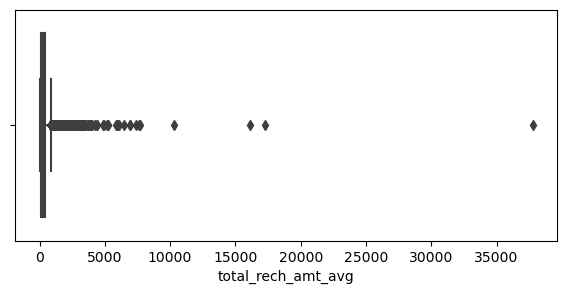

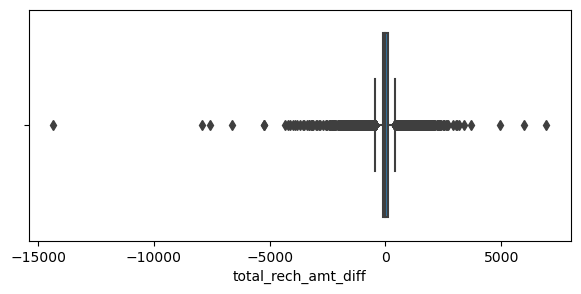

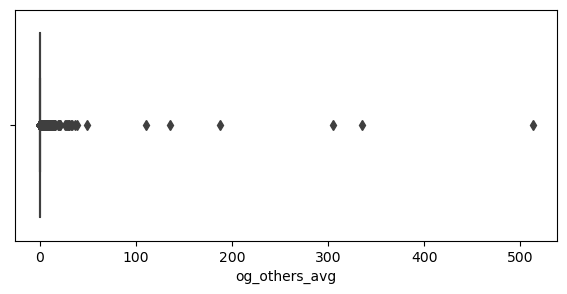

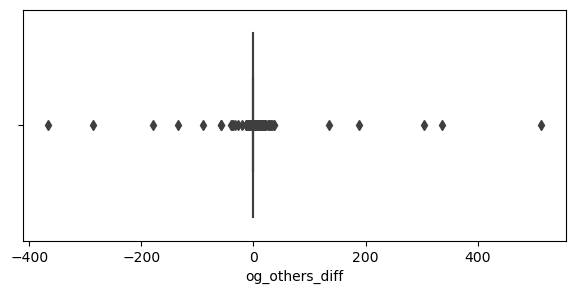

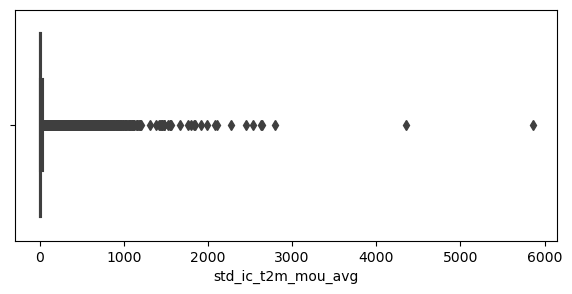

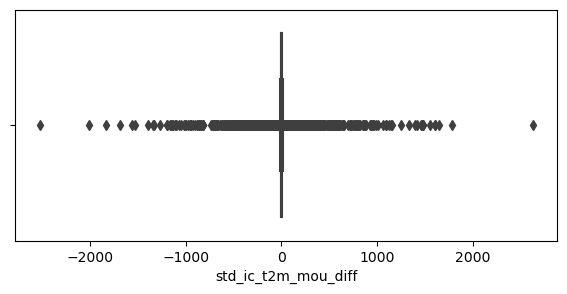

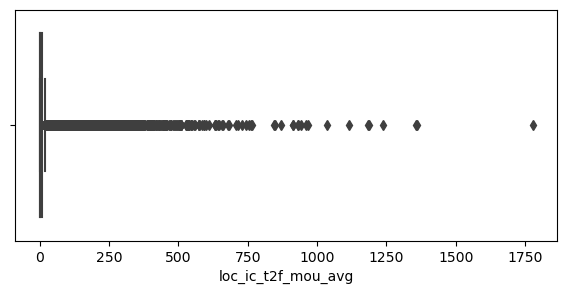

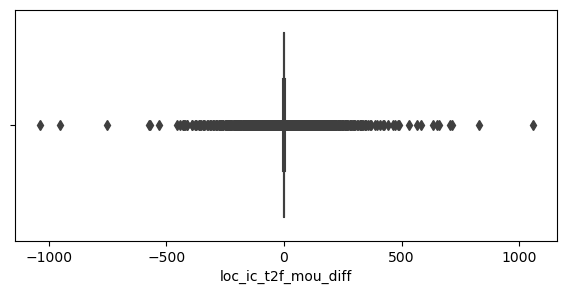

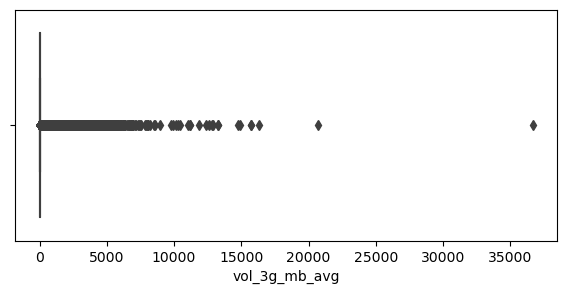

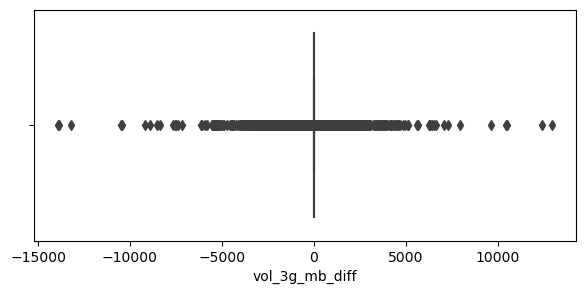

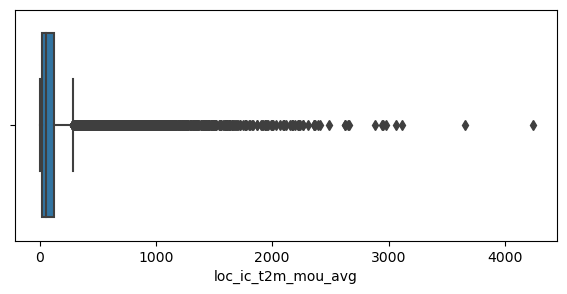

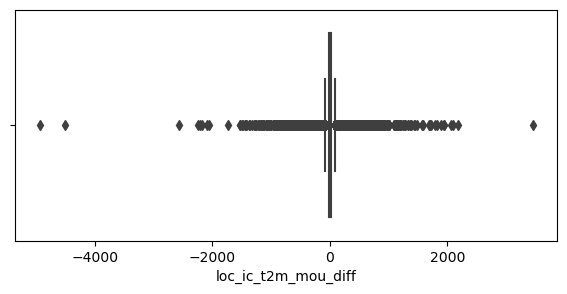

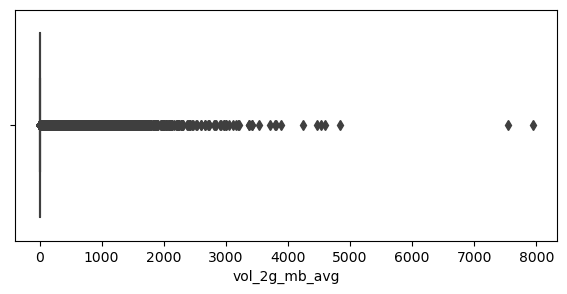

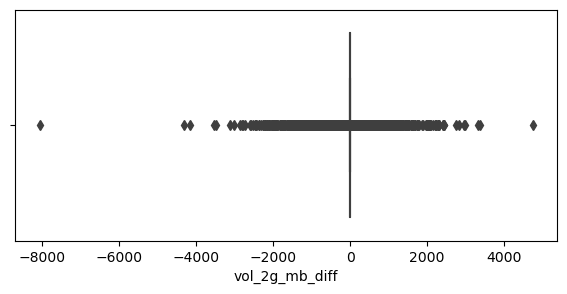

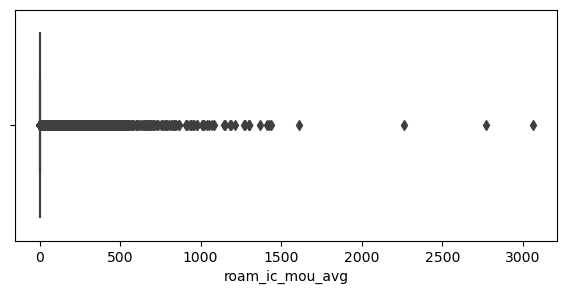

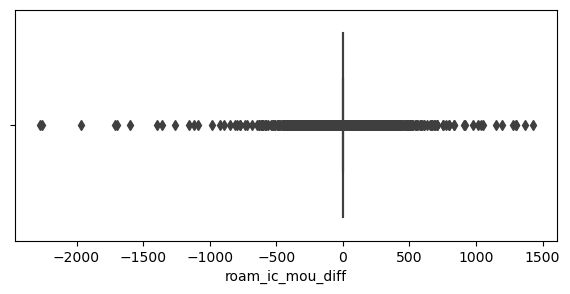

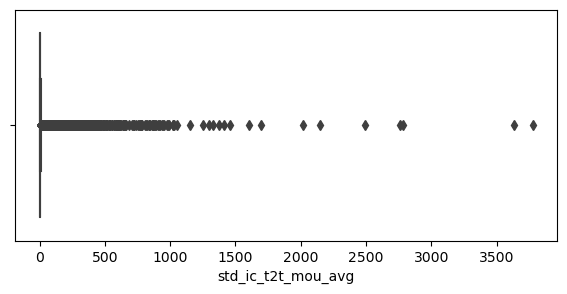

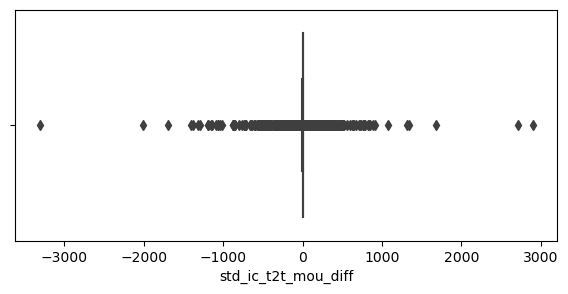

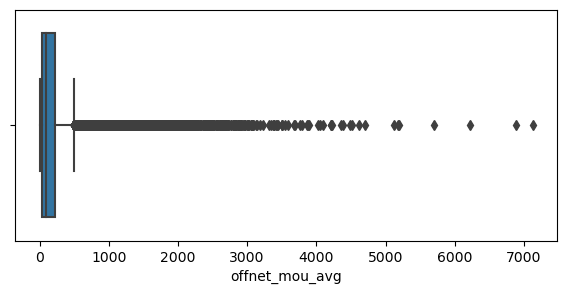

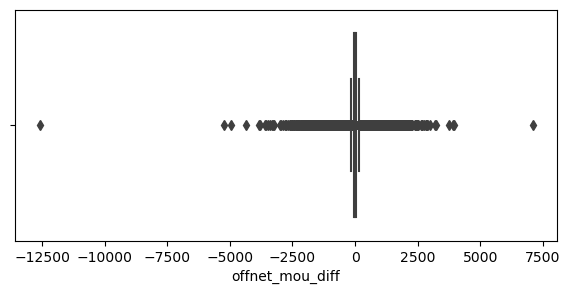

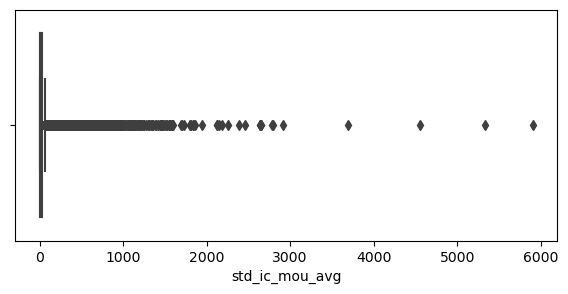

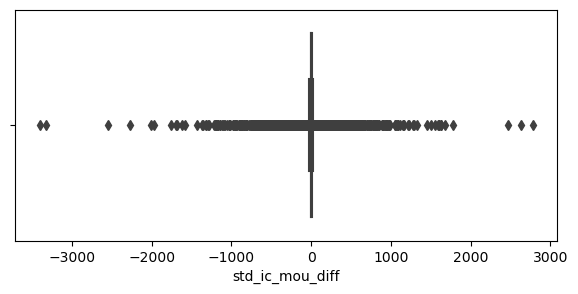

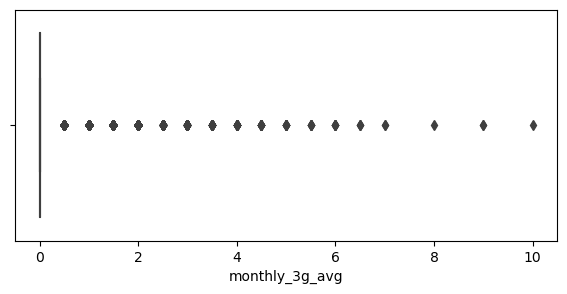

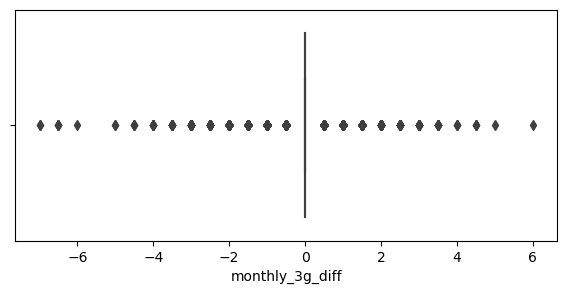

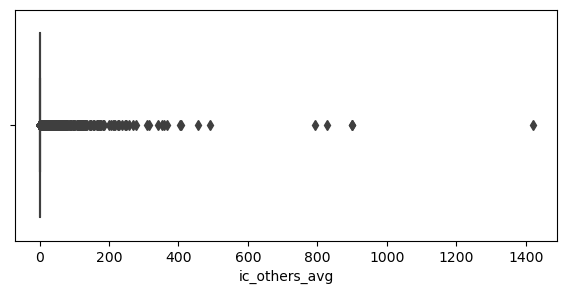

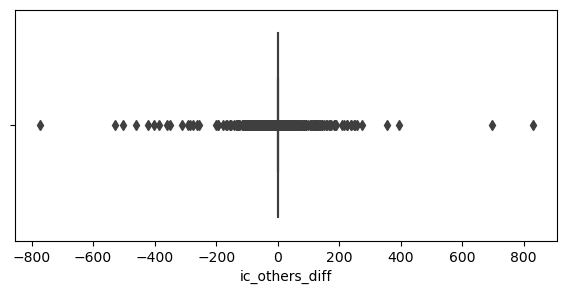

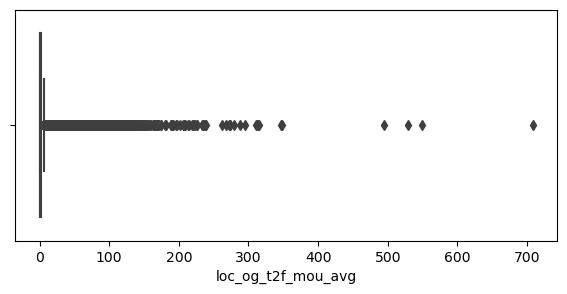

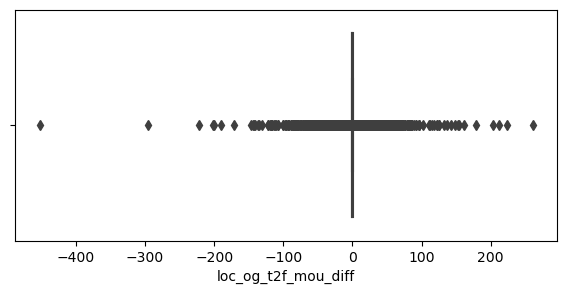

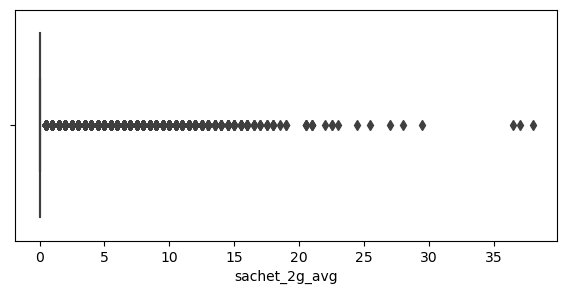

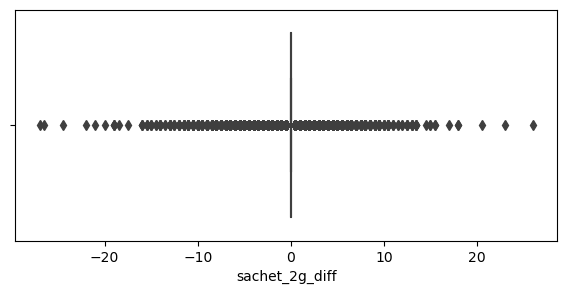

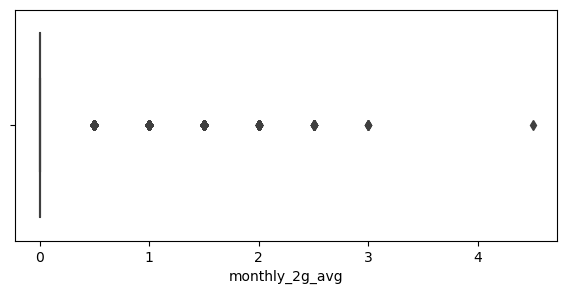

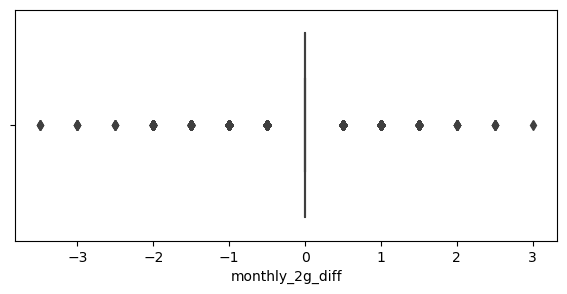

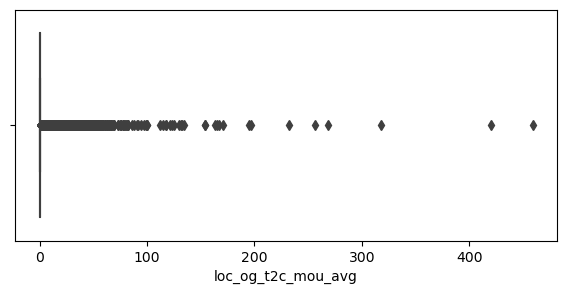

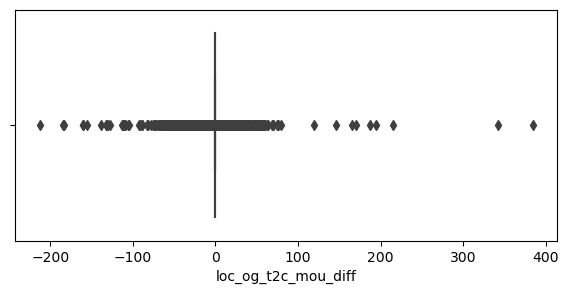

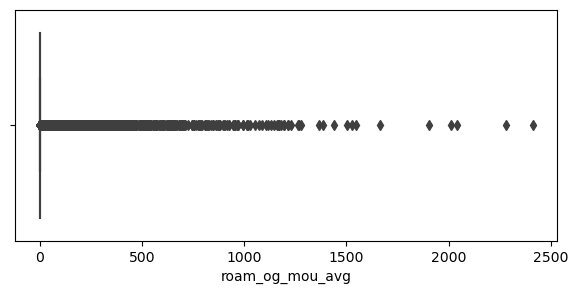

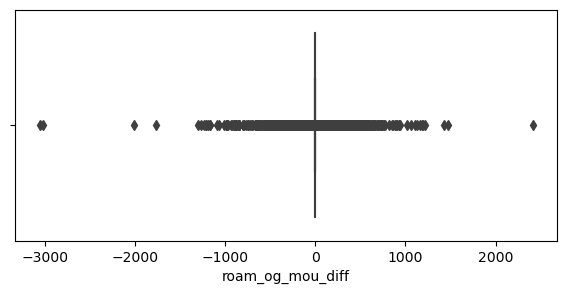

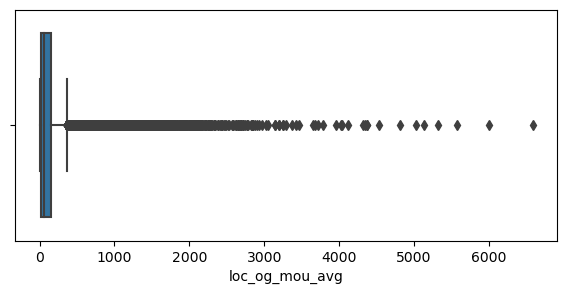

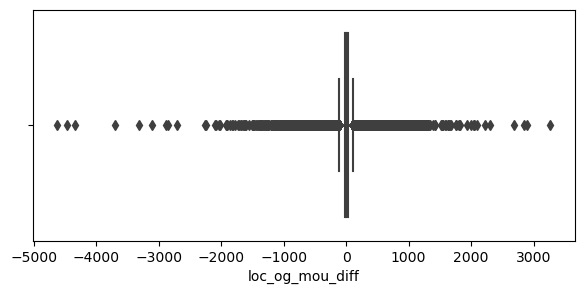

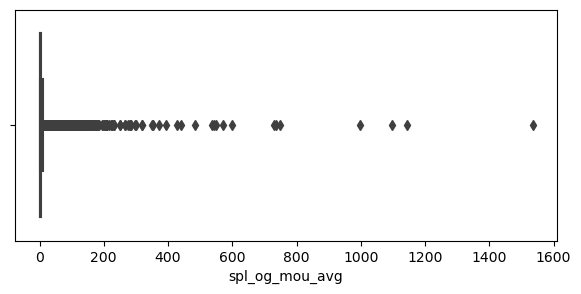

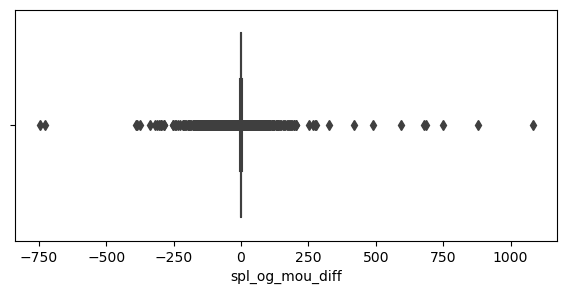

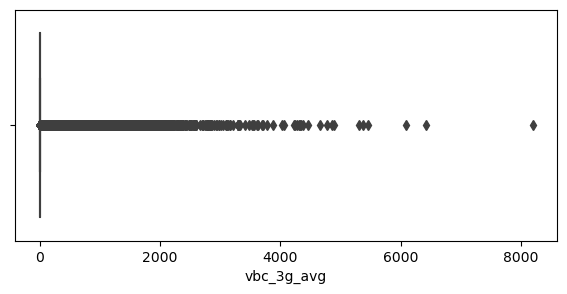

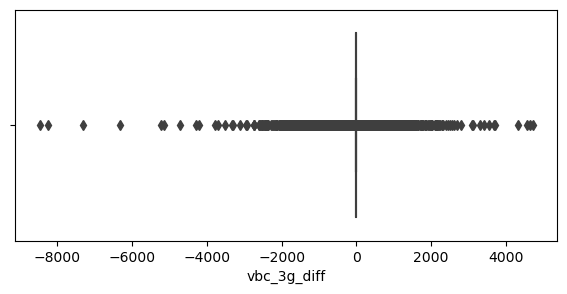

In [15]:
cols_with_std_0 = []
for col in df.columns:
    plt.figure(figsize=(7,3))
    sns.boxplot(x=col, data=df)
    print(col,'std:', df[col].std())
    if df[col].std() == 0:
        cols_with_std_0.append(col)
df.drop(columns=cols_with_std_0, inplace=True)

In [16]:
##Removing outlier
outlier_columns = ['aon', 'std_og_mou_avg', 'last_day_rch_amt_avg', 'onnet_mou_avg', 'loc_ic_mou_avg', 'loc_og_mou_avg', 'max_rech_amt_avg', 'loc_ic_t2m_mou_avg', 'loc_og_t2m_mou_avg', 'offnet_mou_avg', 'total_rech_num_avg', 'total_ic_mou_avg', 'total_og_mou_avg']
for col in outlier_columns:
    if col != 'churn_probability'  and 'diff' not in col :
        iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
        uqr = df[col].quantile(0.75) + (iqr*1.5)
        lqr = df[col].quantile(0.25) - (iqr*1.5)
        df = df[(df[col] >=lqr) & (df[col] <= uqr)]
        print(col, '-->', df.shape)

aon --> (69938, 85)
std_og_mou_avg --> (60801, 85)
last_day_rch_amt_avg --> (57789, 85)
onnet_mou_avg --> (52222, 85)
loc_ic_mou_avg --> (48719, 85)
loc_og_mou_avg --> (45660, 85)
max_rech_amt_avg --> (44353, 85)
loc_ic_t2m_mou_avg --> (42280, 85)
loc_og_t2m_mou_avg --> (40267, 85)
offnet_mou_avg --> (37902, 85)
total_rech_num_avg --> (35991, 85)
total_ic_mou_avg --> (34670, 85)
total_og_mou_avg --> (34217, 85)


In [17]:
df.iloc[:, :15].describe()

,id,aon,churn_probability,loc_ic_t2t_mou_avg,loc_ic_t2t_mou_diff,arpu_avg,arpu_diff,std_og_t2f_mou_avg,std_og_t2f_mou_diff,last_day_rch_amt_avg,last_day_rch_amt_diff,isd_og_mou_avg,isd_og_mou_diff,std_ic_t2f_mou_avg,std_ic_t2f_mou_diff
count,34217.000000,34217.000000,34217.000000,34217.000000,34217.000000,34217.000000,34217.000000,34217.000000,34217.000000,34217.000000,34217.000000,34217.000000,34217.000000,34217.000000,34217.000000
mean,35027.529737,1176.613818,0.115440,20.152984,-2.434349,126.458943,-28.185765,0.611879,-0.034025,38.073867,-7.104115,0.175430,-0.107877,1.034978,-0.127648
std,20218.185549,929.867076,0.319556,30.977680,36.281781,89.395818,161.289023,3.962881,4.028343,39.151987,73.069252,2.619562,6.080999,5.381837,6.888018
min,0.000000,180.000000,0.000000,0.000000,-1245.855000,-25.070000,-5721.327000,0.000000,-188.570000,0.000000,-2066.500000,0.000000,-509.680000,0.000000,-565.780000
25%,17487.000000,451.000000,0.000000,1.420000,-5.970000,66.470000,-77.221000,0.000000,0.000000,10.000000,-22.000000,0.000000,0.000000,0.000000,0.000000
50%,35030.000000,828.000000,0.000000,8.605000,0.000000,107.756000,-3.771000,0.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,52703.000000,1706.000000,0.000000,25.235000,5.590000,165.716500,55.561000,0.000000,0.000000,55.000000,25.000000,0.000000,0.000000,0.000000,0.000000
max,69998.000000,3821.000000,1.000000,312.055000,294.645000,2757.720000,1658.370000,184.780000,83.850000,177.000000,177.000000,164.580000,149.610000,228.030000,228.030000


### Bivariate Analysis

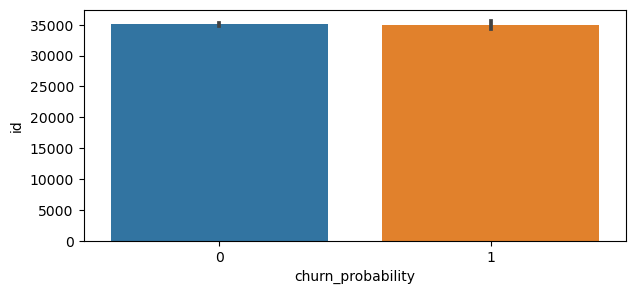

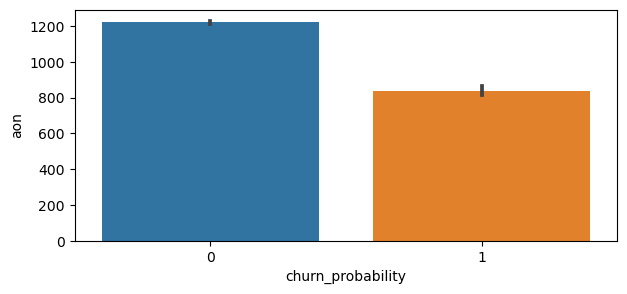

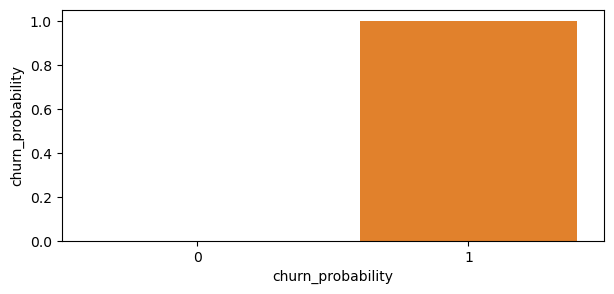

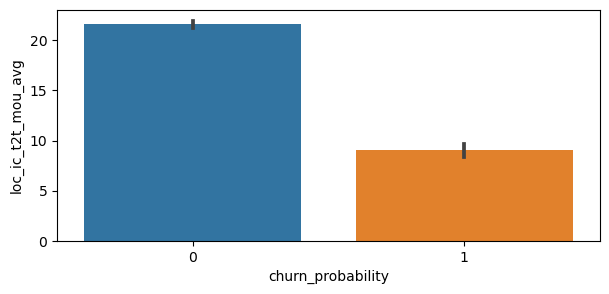

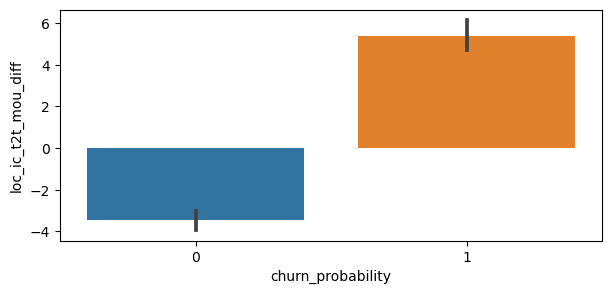

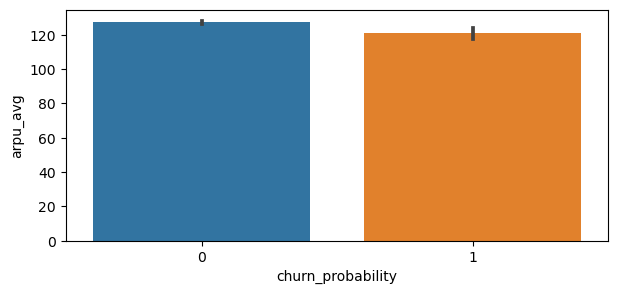

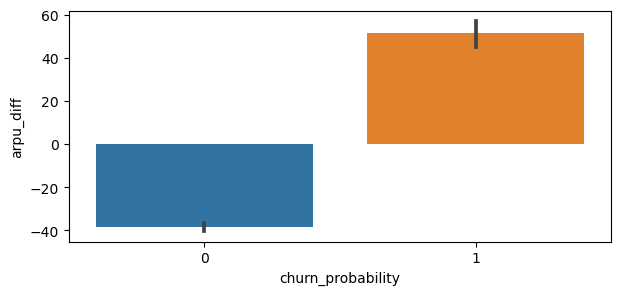

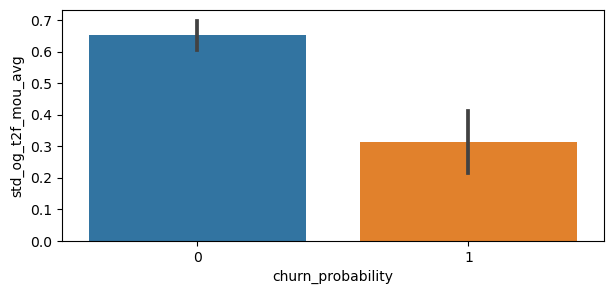

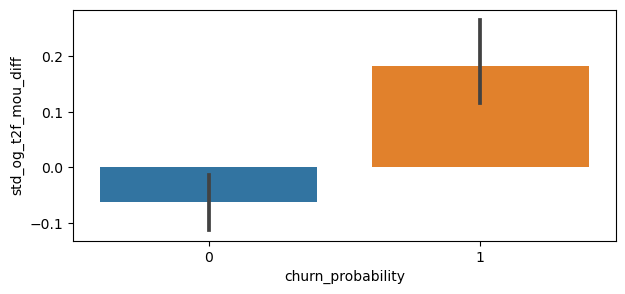

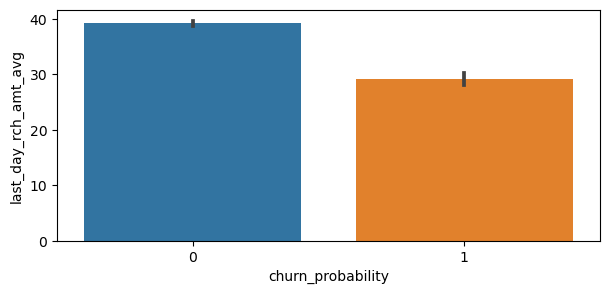

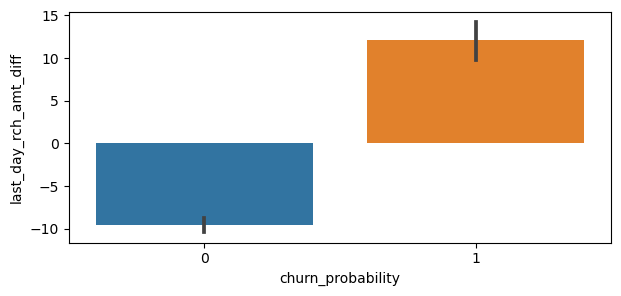

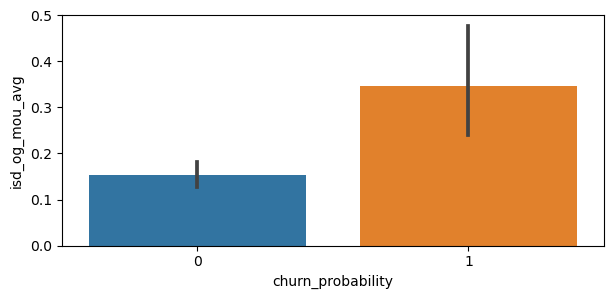

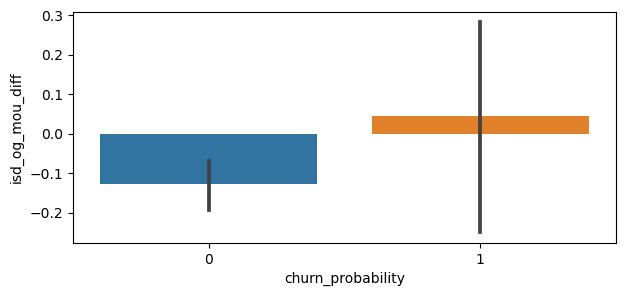

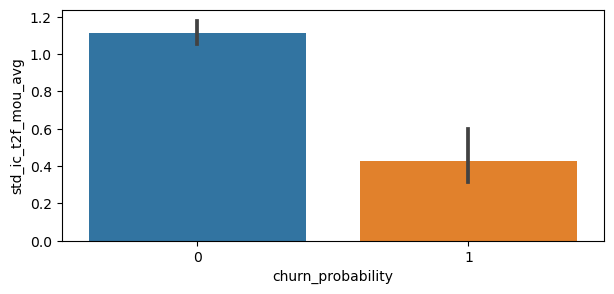

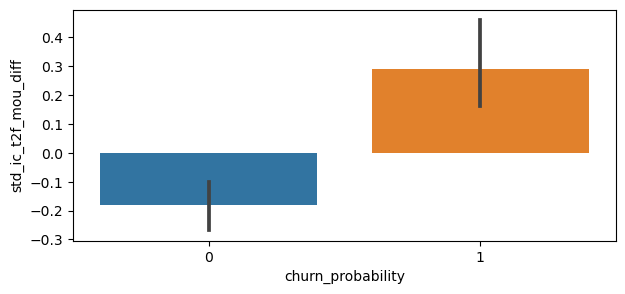

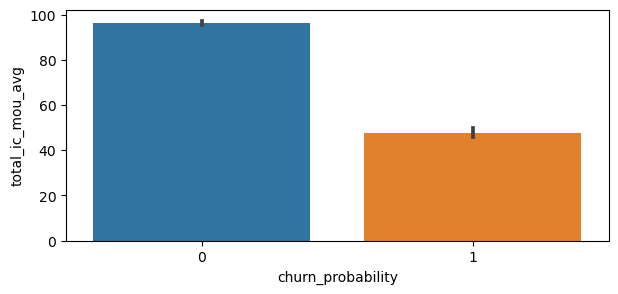

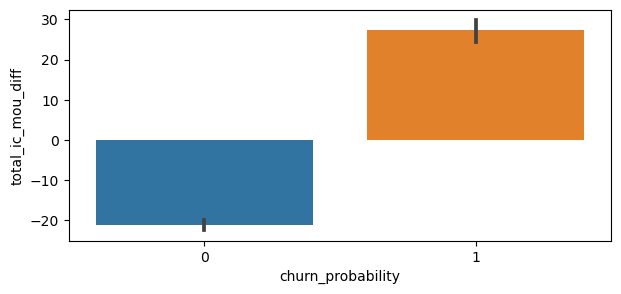

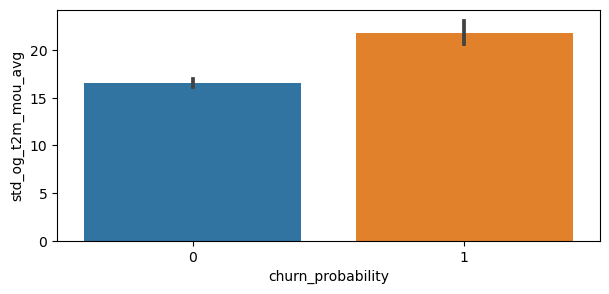

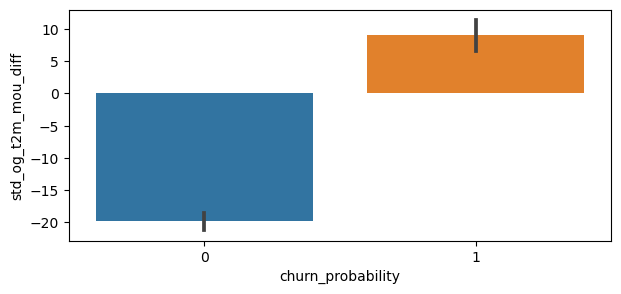

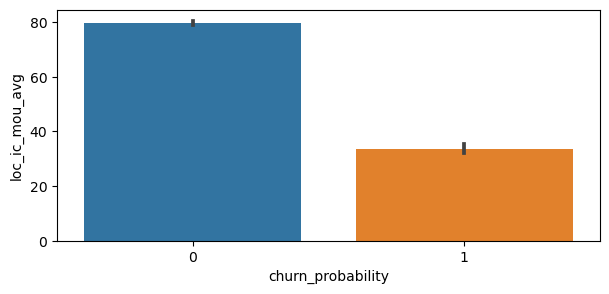

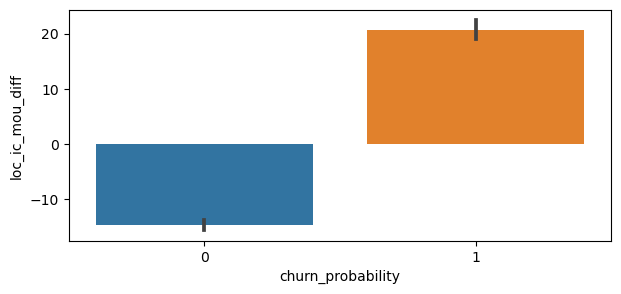

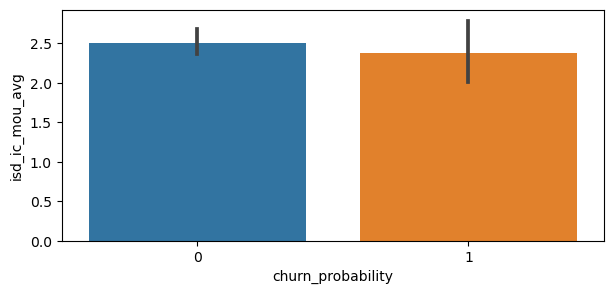

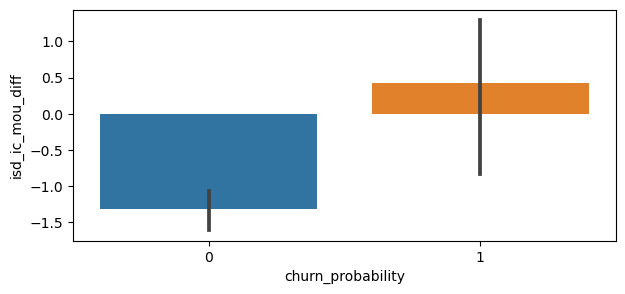

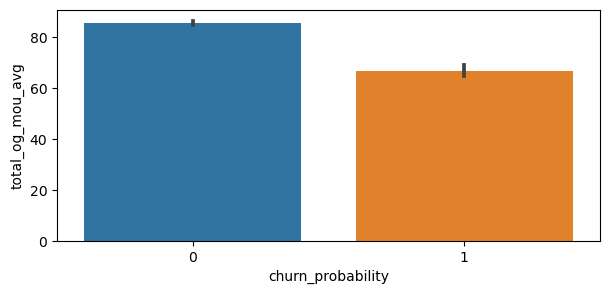

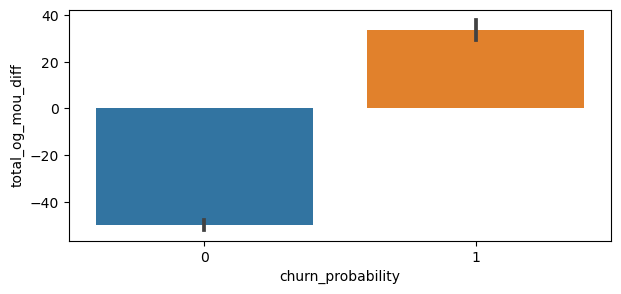

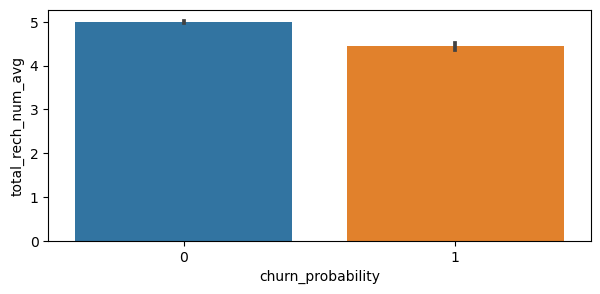

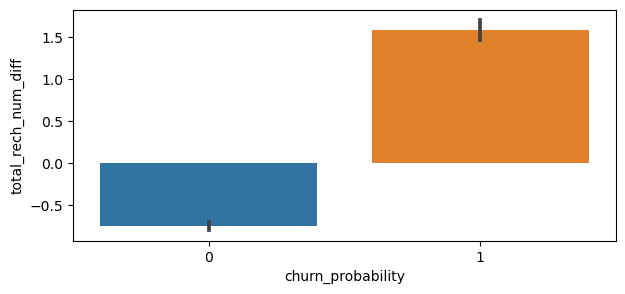

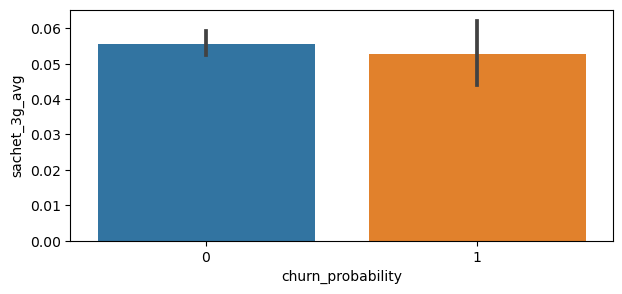

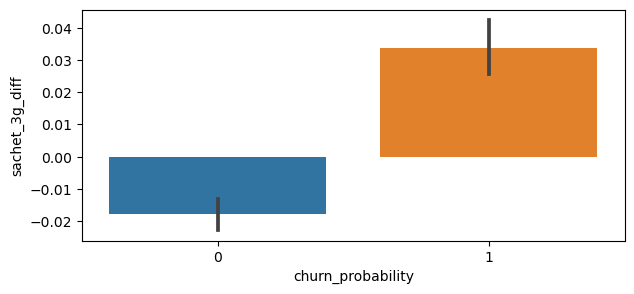

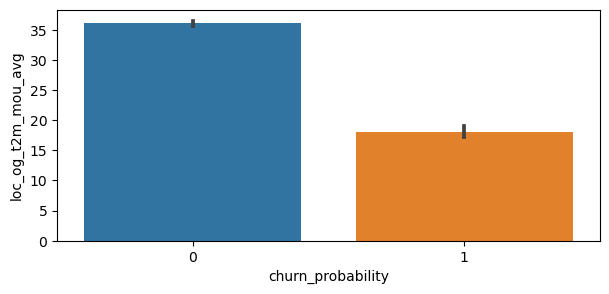

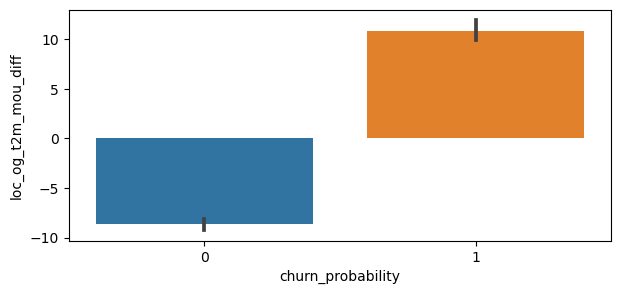

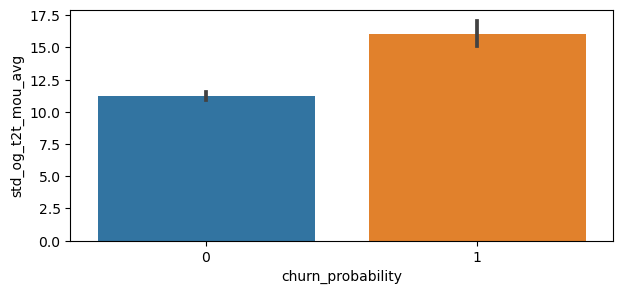

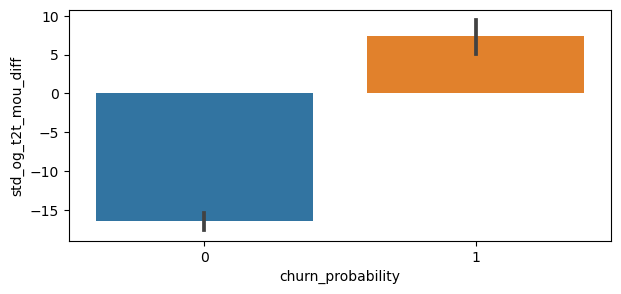

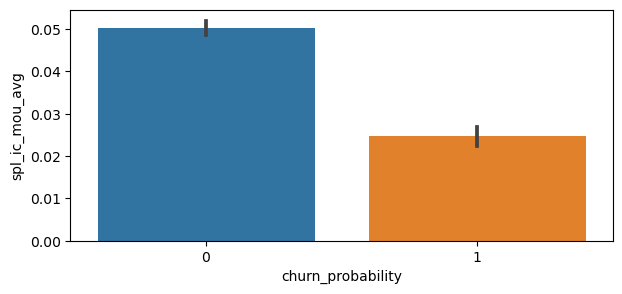

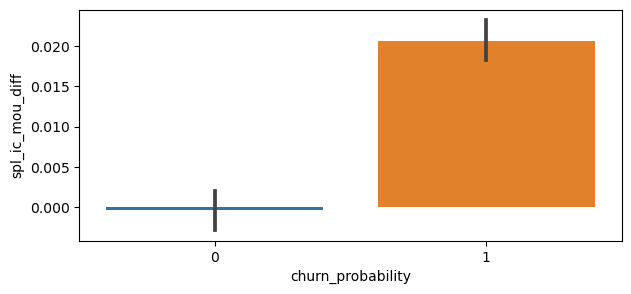

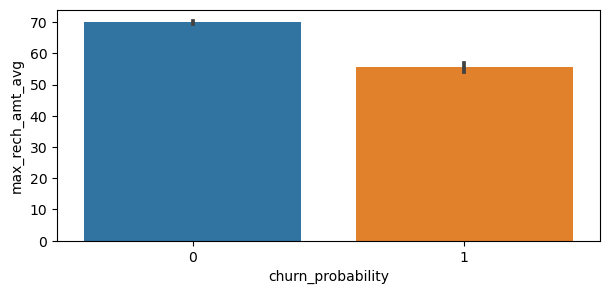

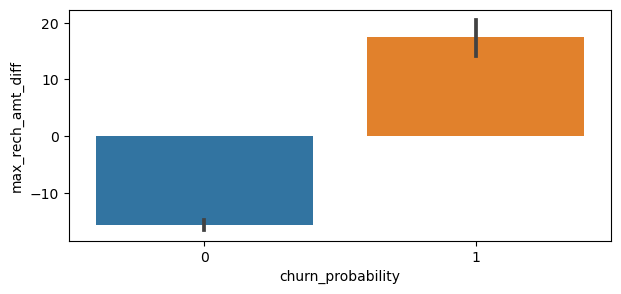

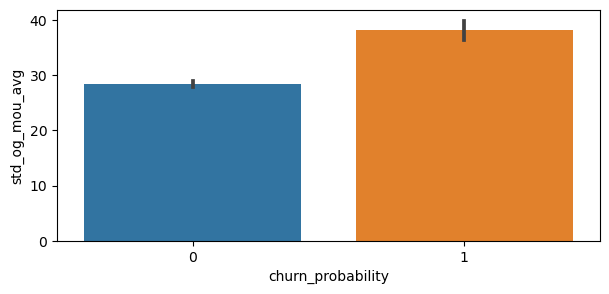

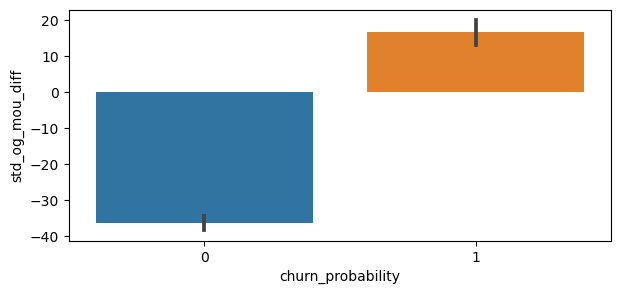

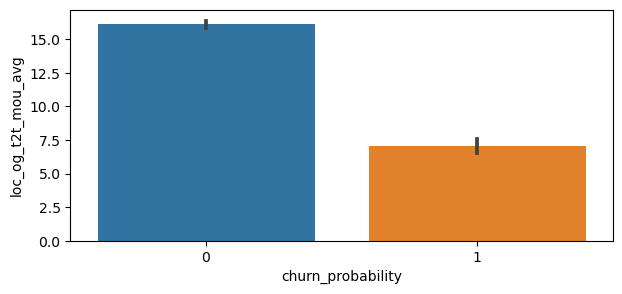

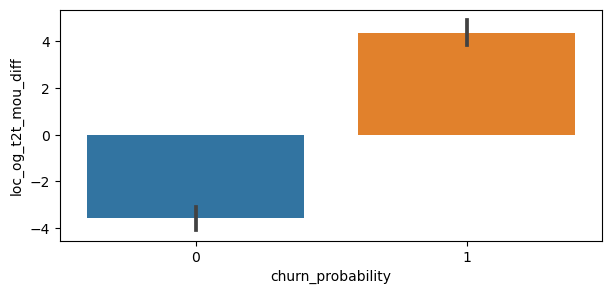

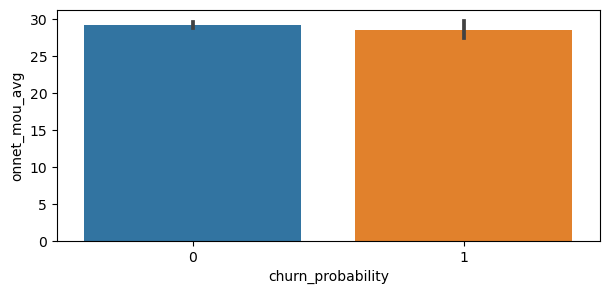

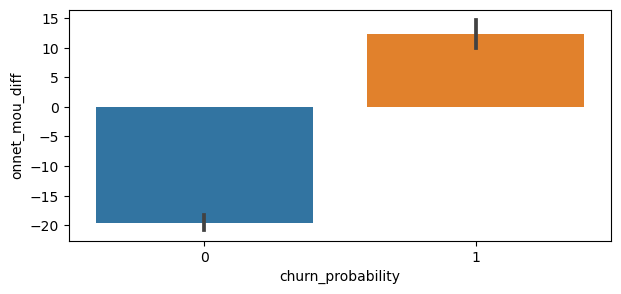

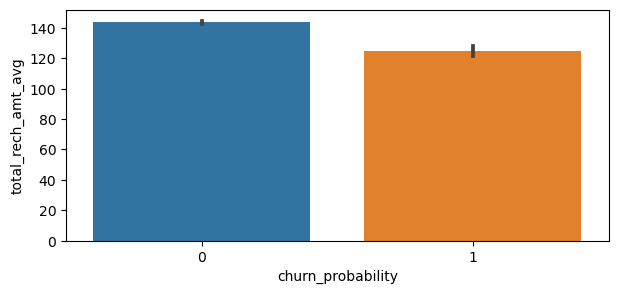

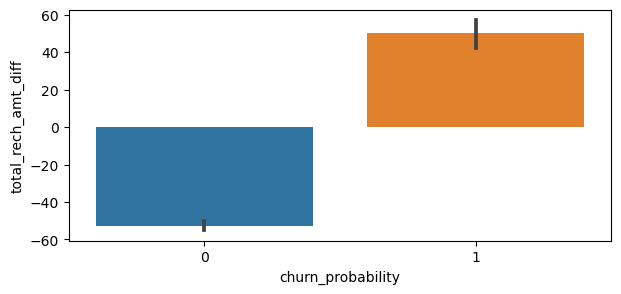

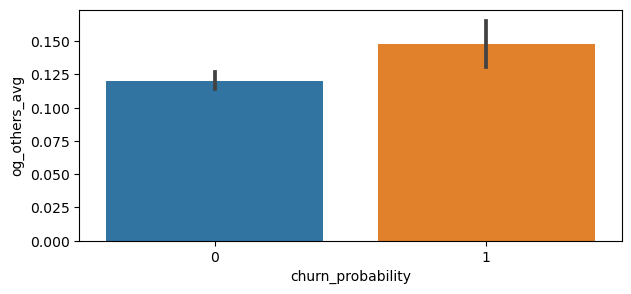

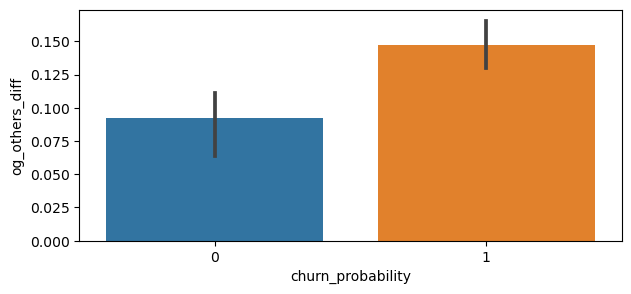

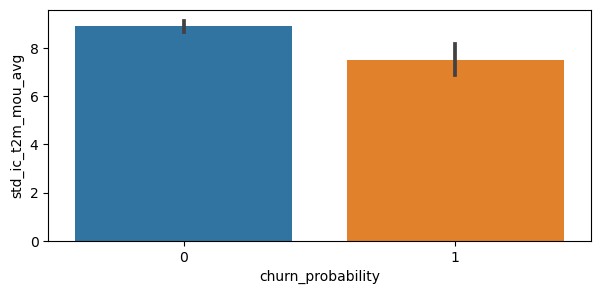

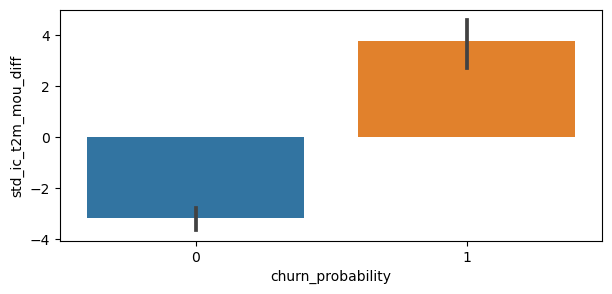

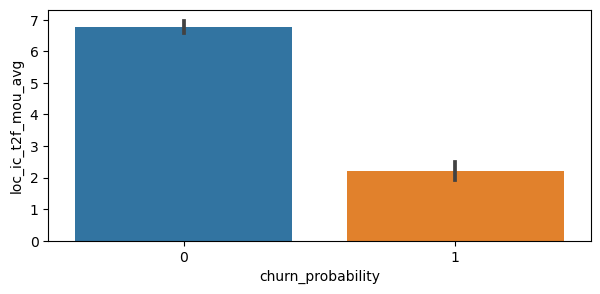

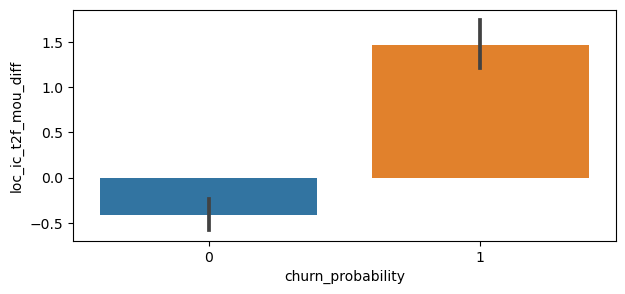

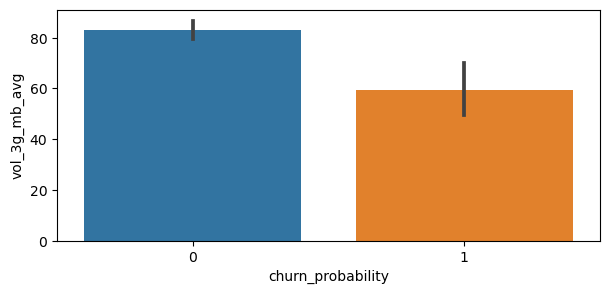

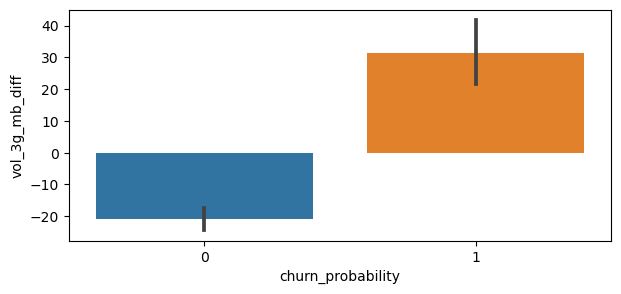

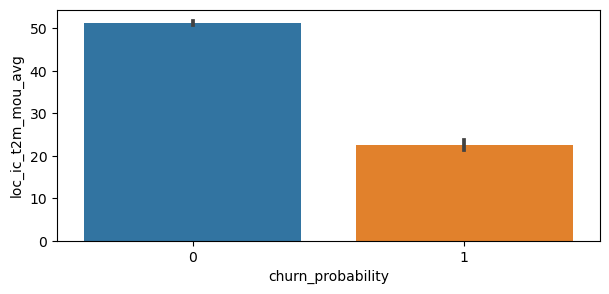

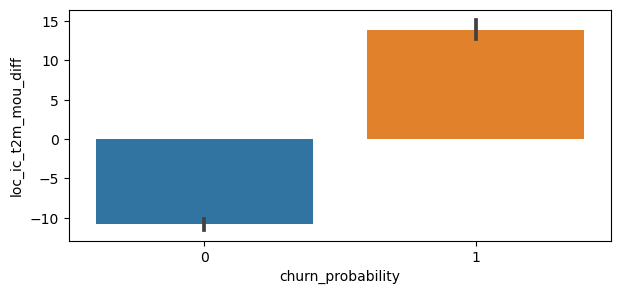

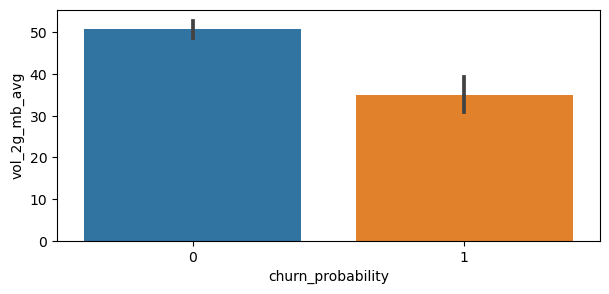

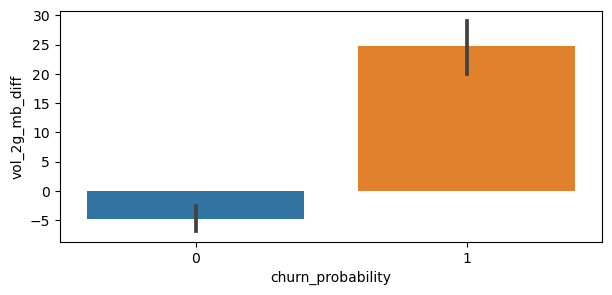

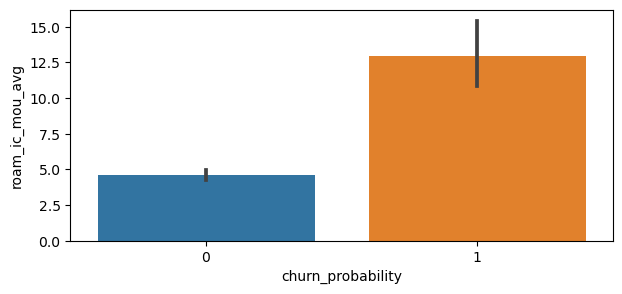

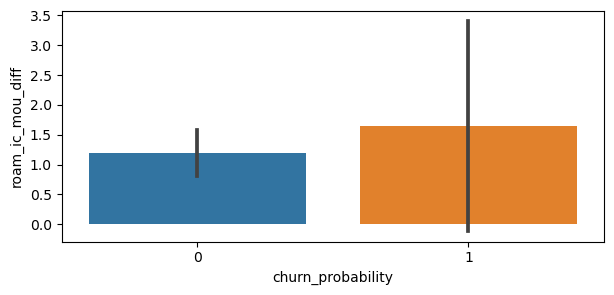

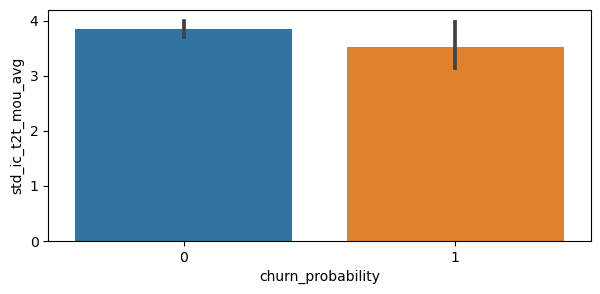

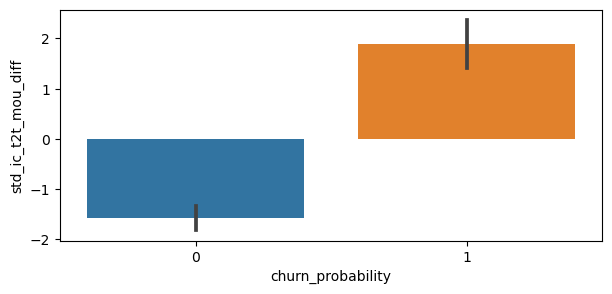

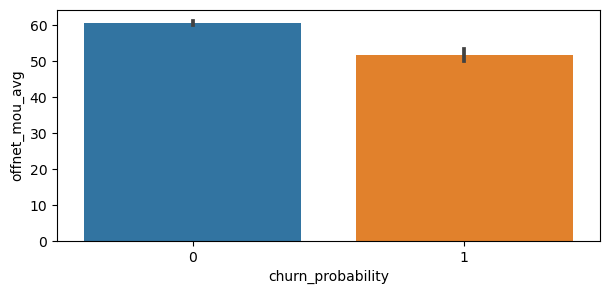

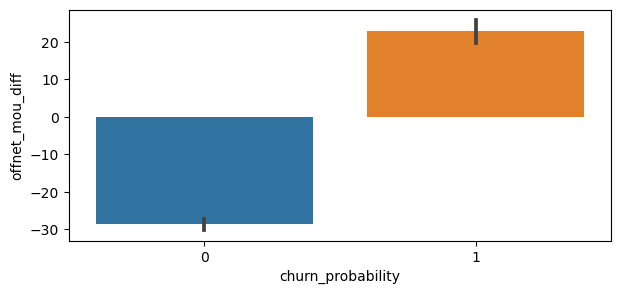

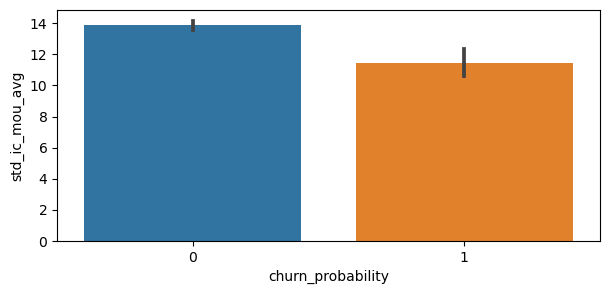

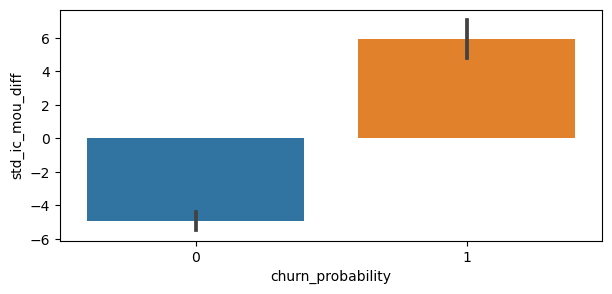

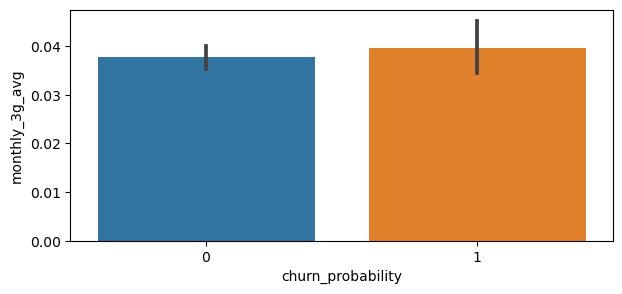

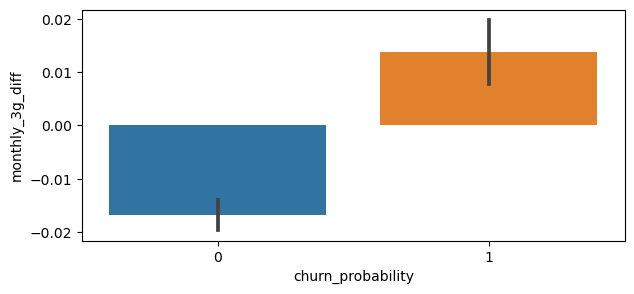

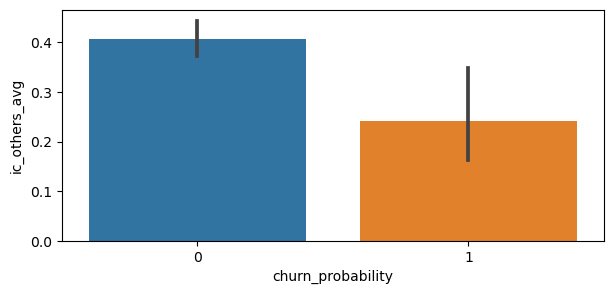

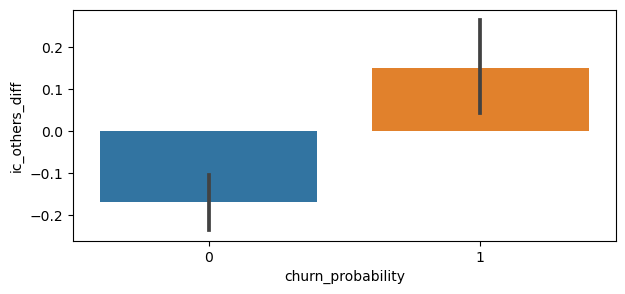

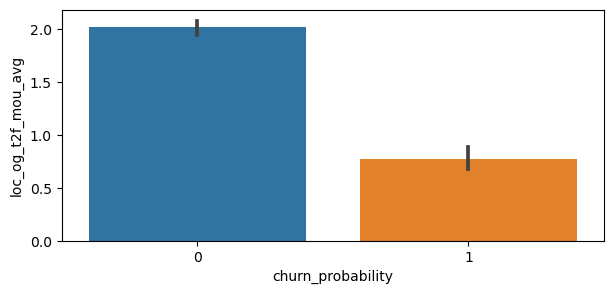

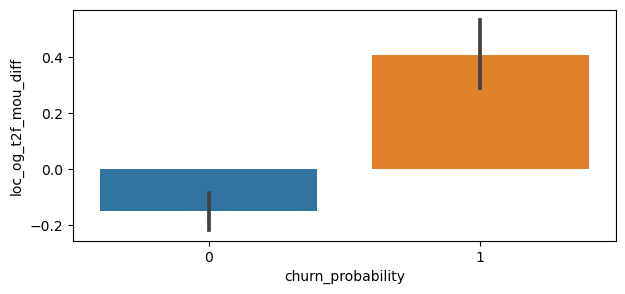

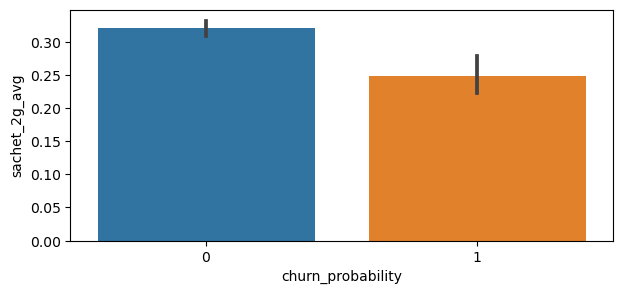

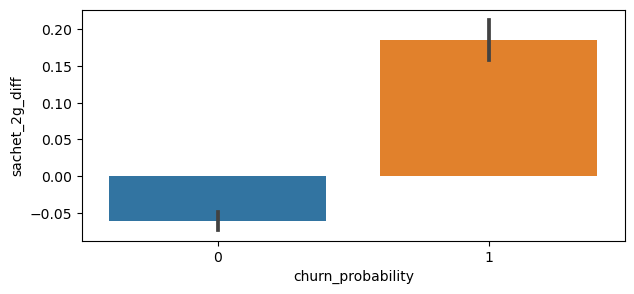

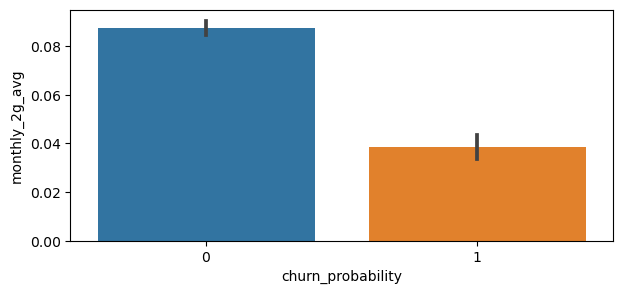

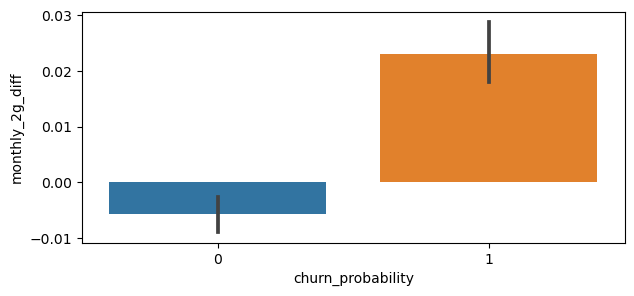

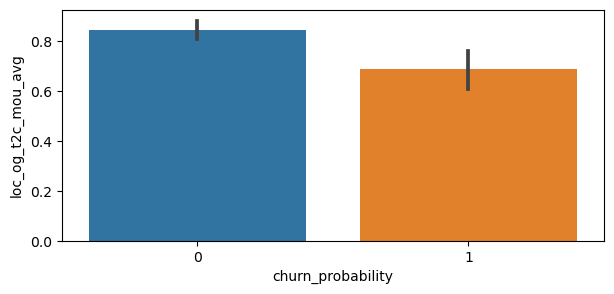

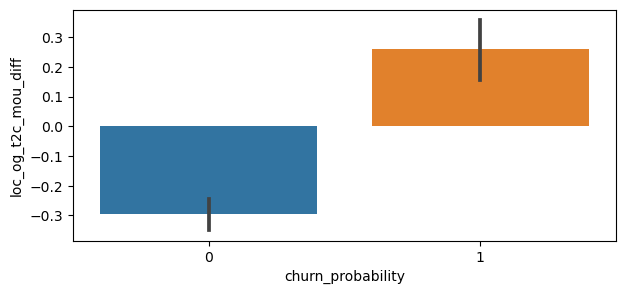

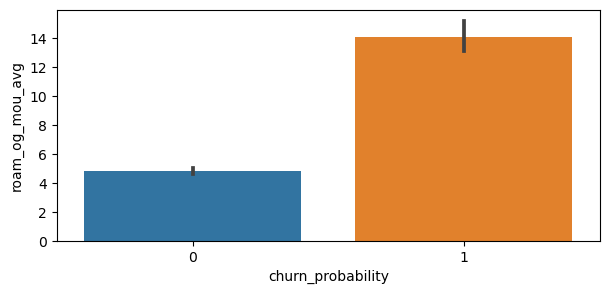

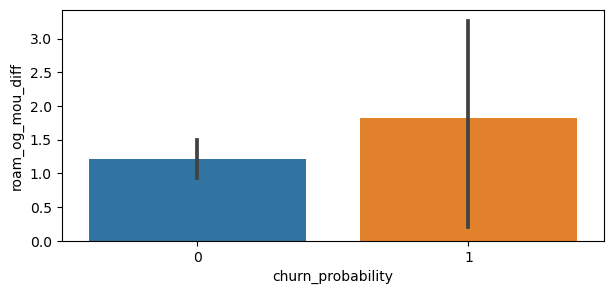

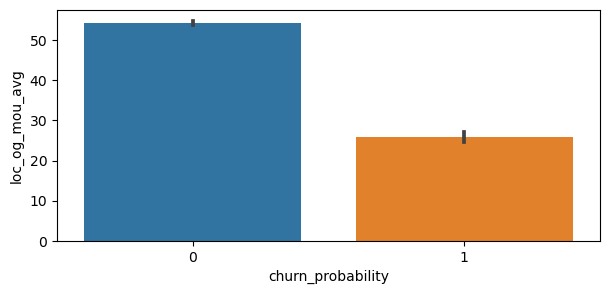

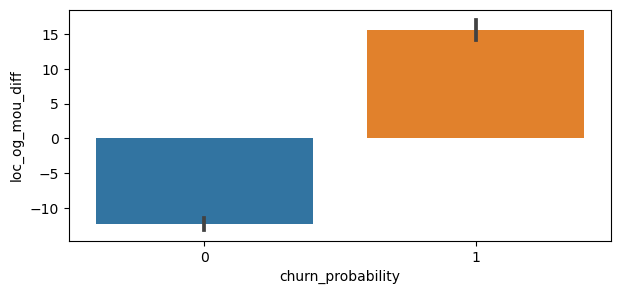

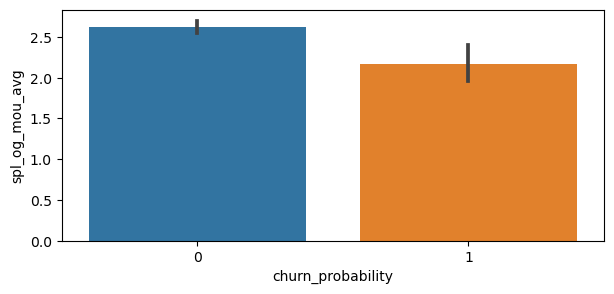

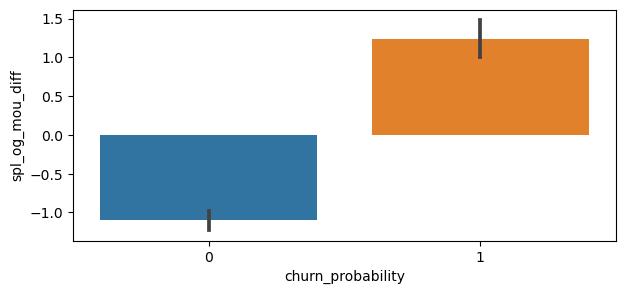

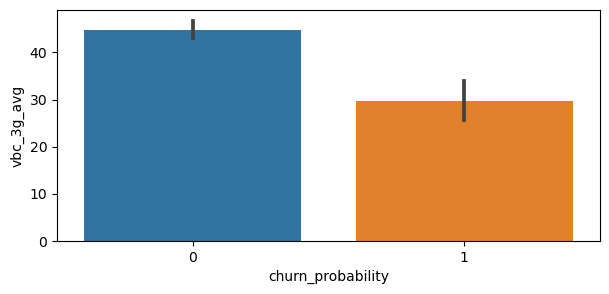

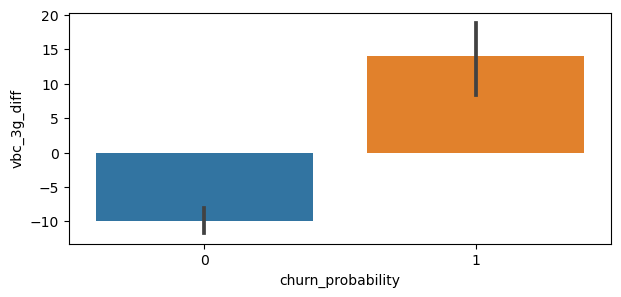

In [18]:
##plotting the bar plot between churn_probability column and all columns in dataframe
for col in df.columns:
    plt.figure(figsize=(7,3))
    sns.barplot(x='churn_probability',y=col, data=df)

#### From Above chart we understood
1. Newer customers are very likely churn compared to older customers. Newer customer's average age around 800days
2. We can see non churn customer usaage are high compared churn.
3. Difference between avg usage and last month usage is high for churned customers

### Handling Imbalance Data

<AxesSubplot:xlabel='churn_probability', ylabel='count'>

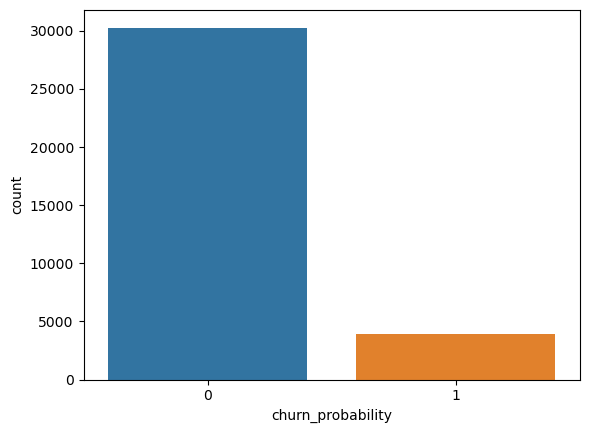

In [19]:
sns.countplot(x='churn_probability', data=df)

In [20]:
##Finding the count of data  between two categories with value_counts  and as we can see that their is imbalance in data
df['churn_probability'].value_counts()

0    30267
1     3950
Name: churn_probability, dtype: int64

In [21]:
new_df = df.copy()

In [22]:
##creating X and Y data frame
y = new_df.loc[:, ['churn_probability']]
new_df.drop(columns=['churn_probability'], inplace=True)

In [23]:
##Using the smote analyis for balancing the imbalance data
smote = SMOTE(random_state = 2)
new_df, y = smote.fit_resample(new_df, y)

In [24]:
##Splitting X and Y
X_train, X_test, y_train, y_test = train_test_split(new_df, y, random_state=42, test_size=0.2)

### Feature Importance

#### Logistic Regression Feature Importance

In [25]:
##Fitting the x_train and y_train in logistic regression
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                48427
Model:                            GLM   Df Residuals:                    48342
Model Family:                Binomial   Df Model:                           84
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16243.
Date:                Tue, 13 Dec 2022   Deviance:                       32487.
Time:                        19:05:16   Pearson chi2:                 5.17e+05
No. Iterations:                    10   Pseudo R-squ. (CS):             0.5110
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     3.2687      0.058     56.249      0.000       3.155       3.383
id                     1.901e-07   7.06e-07      0.269      0.788   -1.19e-06    1.57e-06
aon                      -0.0003    1.9e-05    -13.429      0.000      -0.000      -0.000
loc_ic_t2t_mou_avg      142.1790      4.745     29.964      0.000     132.879     151.479
loc_ic_t2t_mou_diff     -81.2260      3.253    -24.973      0.000     -87.601     -74.851
arpu_avg                  0.0072      0.001     10.416      0.000       0.006       0.009
arpu_diff                -0.0031      0.000     -8.331      0.000      -0.004      -0.002
std_og_t2f_mou_avg      -15.8680      8.137     -1.950      0.051     -31.817       0.081
std_og_t2f_mou_diff      -0.5781      5.314     -0.109      0.913     -10.994       9.837
last_day_rch_amt_avg     -0.0075      0.001    -11.290      0.000      -0.009      -0.006
last_day_rch_amt_diff     0.0053      0.000     14.844      0.000       0.005       0.006
isd_og_mou_avg           18.3790      4.950      3.713      0.000       8.678      28.080
isd_og_mou_diff         -19.9807      3.346     -5.972      0.000     -26.538     -13.423
std_ic_t2f_mou_avg       -9.9120      8.350     -1.187      0.235     -26.277       6.453
std_ic_t2f_mou_diff     -29.7876      5.724     -5.204      0.000     -41.007     -18.569
total_ic_mou_avg        -92.1737      5.110    -18.037      0.000    -102.190     -82.158
total_ic_mou_diff        83.0267      3.470     23.925      0.000      76.225      89.828
std_og_t2m_mou_avg      -15.8681      8.137     -1.950      0.051     -31.815       0.079
std_og_t2m_mou_diff      -0.5860      5.314     -0.110      0.912     -11.001       9.829
loc_ic_mou_avg          -50.0105      6.923     -7.223      0.000     -63.580     -36.441
loc_ic_mou_diff          -1.7962      4.560     -0.394      0.694     -10.733       7.140
isd_ic_mou_avg           92.1831      5.111     18.038      0.000      82.167     102.199
isd_ic_mou_diff         -83.0298      3.470    -23.926      0.000     -89.832     -76.228
total_og_mou_avg        -18.3794      4.949     -3.714      0.000     -28.080      -8.679
total_og_mou_diff        19.9744      3.346      5.970      0.000      13.417      26.532
total_rech_num_avg       -0.1881      0.010    -17.959      0.000      -0.209      -0.168
total_rech_num_diff       0.1726      0.008     22.859      0.000       0.158       0.187
sachet_3g_avg            -0.3161      0.061     -5.147      0.000      -0.436      -0.196
sachet_3g_diff            0.3410      0.069      4.962      0.000       0.206       0.476
loc_og_t2m_mou_avg      101.4562      5.303     19.133      0.000      91.063     111.849
loc_og_t2m_mou_diff     -53.9698      3.601    -14.988      0.000     -61.027     -46.912
std_og_t2t_mou_avg     

In [26]:
##predicting in logistic regression
y_pred = res.predict(sm.add_constant(X_test)).values.reshape(-1)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]

In [27]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('ROC AUC:', roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8661105145783431
ROC AUC: 0.8658082695684075
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      5952
           1       0.86      0.88      0.87      6155

    accuracy                           0.87     12107
   macro avg       0.87      0.87      0.87     12107
weighted avg       0.87      0.87      0.87     12107



#### XGB Classifier

In [28]:
##Fitting the x_train,y_train in xgbclassifier
xgbm = XGBClassifier()
xgbm_model = xgbm.fit(X_train, y_train)

In [29]:
##printing the feature importance
fi = pd.DataFrame({
    'features':list(new_df.columns),
    'importance':list(xgbm_model.feature_importances_)}
)
fi.sort_values(ascending=False, by='importance')

,features,importance
5,arpu_diff,0.099402
18,loc_ic_mou_avg,0.065917
77,roam_og_mou_diff,0.056429
19,loc_ic_mou_diff,0.053188
15,total_ic_mou_diff,0.047680
...,...,...
60,offnet_mou_avg,0.002102
68,loc_og_t2f_mou_avg,0.002004
28,loc_og_t2m_mou_avg,0.001920
6,std_og_t2f_mou_avg,0.001899


In [30]:
##fitting and predicting the Accuracy
y_pred = xgbm_model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('ROC AUC:', roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9536631700669035
ROC AUC: 0.9536404422490674
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5952
           1       0.95      0.95      0.95      6155

    accuracy                           0.95     12107
   macro avg       0.95      0.95      0.95     12107
weighted avg       0.95      0.95      0.95     12107



In [31]:
##Applying the scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Apply PCA

In [32]:
##Fitting in pca
pca = PCA(random_state=42)
pca.fit(X_train_scaled)

PCA(random_state=42)

In [33]:
##Getting the pca components
pca.components_

array([[-1.88844247e-03, -2.69152893e-02, -8.78371448e-02, ...,
        -9.09408556e-02, -2.74735613e-02, -3.82471792e-02],
       [-8.78690902e-07,  1.17448579e-01,  1.96874071e-01, ...,
        -5.65704427e-02,  3.49963478e-02, -2.48107100e-02],
       [ 5.04109025e-03,  5.34226280e-02,  2.65882404e-02, ...,
         9.17781244e-03,  2.58315601e-01,  1.20232460e-01],
       ...,
       [-1.33780715e-07, -1.27438895e-06, -9.62619512e-02, ...,
        -1.48060827e-02, -5.91943412e-07,  3.15856754e-07],
       [ 3.70877385e-08,  8.24252214e-07, -2.01737441e-02, ...,
         3.30075128e-02,  3.86874448e-07, -1.85698902e-07],
       [-7.44787165e-08, -1.97924991e-07, -4.73172081e-03, ...,
        -1.22951136e-02,  1.76513129e-07, -2.47855860e-07]])

In [34]:
##Explanation of Variance ratio
sorted(pca.explained_variance_ratio_)

[1.7486959391978836e-12,
 5.400148319098536e-12,
 7.135719029138552e-12,
 1.1105140418299908e-11,
 1.4728290528167593e-11,
 2.1799886782243496e-11,
 2.482937178615292e-11,
 2.7852503646245775e-11,
 4.3341369078679544e-11,
 6.081024933266891e-11,
 7.249650465672282e-11,
 1.084567046543248e-10,
 3.901479575237633e-06,
 9.518874593876743e-06,
 8.60060440956065e-05,
 0.0003134962618112624,
 0.000382112153041431,
 0.0012784102654522682,
 0.0013253723743469562,
 0.0018454968069054507,
 0.0021773865886383693,
 0.002895907268120791,
 0.003091113196414592,
 0.0034028952789887617,
 0.0035135924526865417,
 0.003938019238786891,
 0.004462700401071559,
 0.004582488229998896,
 0.004711564776593221,
 0.005139092251663335,
 0.005445454769700248,
 0.005728331666761226,
 0.00605876562434607,
 0.006332219545446348,
 0.006453937998210786,
 0.006632830318530279,
 0.006692119878868501,
 0.006878247871771475,
 0.006943649594023842,
 0.0072937516323413505,
 0.0076173839940613065,
 0.008049948982734726,
 0.008

Text(0, 0.5, 'Cumulative variance')

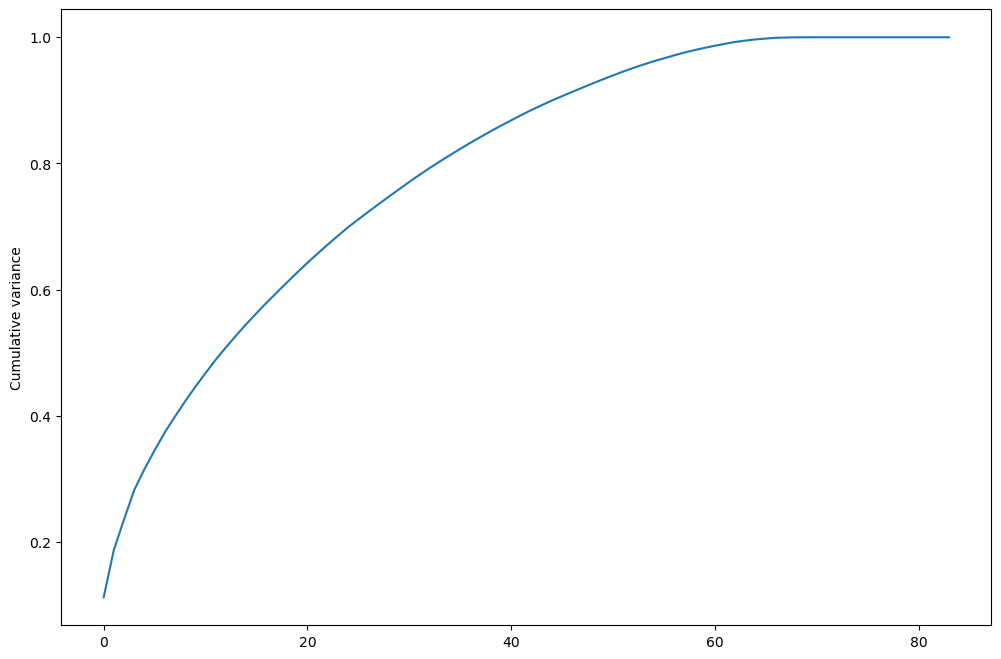

In [35]:
##plotting the variance ratio
var_cum = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[12,8])
plt.plot(var_cum)
plt.ylabel('Cumulative variance')

In [40]:
#Perform PCA using 55 features

In [41]:
from sklearn.decomposition import IncrementalPCA

In [42]:
##Applying incremental pca
inc_pca = IncrementalPCA(n_components=55)
pca_train_df = inc_pca.fit_transform(X_train)
pca_test_df = inc_pca.transform(X_test)
print(pca_train_df.shape, pca_test_df.shape)

(48427, 55) (12107, 55)


In [43]:
cormat = np.corrcoef(pca_train_df.transpose())

### Prediction

#### Logistic Regression

In [44]:
##Logistic regression with pca by fitting the pca train and test data set and getting Accuracy and Roc AUC
log_reg = LogisticRegression()
log_model = log_reg.fit(pca_train_df, y_train)
y_pred = log_model.predict(pca_test_df)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('ROC AUC:', roc_auc_score(y_test, y_pred))

Accuracy: 0.8055670273395557
ROC AUC: 0.8035618416053039


In [45]:
##printing the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.68      0.78      5952
           1       0.75      0.92      0.83      6155

    accuracy                           0.81     12107
   macro avg       0.82      0.80      0.80     12107
weighted avg       0.82      0.81      0.80     12107



#### XGBoost Classification

In [46]:
##XGBOOST Classification with pca and predicting the roc and accuracy by fitting the data
xgb_cl = XGBClassifier()
xgb_model_cl = xgb_cl.fit(pca_train_df, y_train)
y_pred = xgb_model_cl.predict(pca_test_df)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('ROC AUC:', roc_auc_score(y_test, y_pred))

Accuracy: 0.9162467993722639
ROC AUC: 0.915827049649293


In [47]:
##printing the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      5952
           1       0.90      0.94      0.92      6155

    accuracy                           0.92     12107
   macro avg       0.92      0.92      0.92     12107
weighted avg       0.92      0.92      0.92     12107



# Random Forest Classifier

In [55]:
##Using RandomForestClassifier with pca and printing roc and accuracy
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=3)
rf_cl = rf.fit(pca_train_df, y_train)
y_pred =rf.predict(pca_test_df)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('ROC AUC:', roc_auc_score(y_test, y_pred))

Accuracy: 0.7850830098290246
ROC AUC: 0.7849366827389219


In [56]:
##printing the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      5952
           1       0.79      0.79      0.79      6155

    accuracy                           0.79     12107
   macro avg       0.79      0.78      0.78     12107
weighted avg       0.79      0.79      0.79     12107



### Using Hyperparameter tuning with PCA

In [57]:
##Setting the RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [58]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200]
}

In [59]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [60]:
##Fitting the pca 
%%time
grid_search.fit(pca_train_df, y_train)

Fitting 4 folds for each of 375 candidates, totalling 1500 fits
Wall time: 24min 2s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [62]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.223201,0.024535,0.092790,0.020540,1,2,5,10,"{'max_depth': 1, 'max_features': 2, 'min_sampl...",0.683902,0.674073,0.704716,0.724930,0.696905,0.019601,371
1,0.409463,0.068185,0.218663,0.073978,1,2,5,30,"{'max_depth': 1, 'max_features': 2, 'min_sampl...",0.741554,0.728504,0.749566,0.755824,0.743862,0.010208,346
2,0.707821,0.114369,0.505281,0.055666,1,2,5,50,"{'max_depth': 1, 'max_features': 2, 'min_sampl...",0.756917,0.749979,0.767242,0.765901,0.760010,0.007021,316
3,1.579301,0.354387,1.173585,0.806667,1,2,5,100,"{'max_depth': 1, 'max_features': 2, 'min_sampl...",0.768646,0.760139,0.771042,0.771436,0.767816,0.004559,286
4,4.362602,0.149949,2.234924,1.341625,1,2,5,200,"{'max_depth': 1, 'max_features': 2, 'min_sampl...",0.766581,0.759478,0.767985,0.773088,0.766783,0.004863,296


In [63]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
354,53.569634,0.720177,8.426254,1.416277,20,4,5,200,"{'max_depth': 20, 'max_features': 4, 'min_samp...",0.899067,0.889898,0.902371,0.896085,0.896855,0.004591,1
353,43.274206,11.951863,15.035583,11.517021,20,4,5,100,"{'max_depth': 20, 'max_features': 4, 'min_samp...",0.897910,0.887586,0.901214,0.893359,0.895017,0.005117,2
329,37.759506,2.844990,7.644381,1.794125,20,3,5,200,"{'max_depth': 20, 'max_features': 3, 'min_samp...",0.896671,0.887916,0.900388,0.893689,0.894666,0.004563,3
328,22.739420,1.488445,19.771294,2.073959,20,3,5,100,"{'max_depth': 20, 'max_features': 3, 'min_samp...",0.895267,0.888412,0.899067,0.894102,0.894212,0.003819,4
352,20.567931,7.007383,29.876228,13.942330,20,4,5,50,"{'max_depth': 20, 'max_features': 4, 'min_samp...",0.895432,0.887421,0.899480,0.891128,0.893365,0.004528,5


In [64]:
##Getting the best_estimator
dt_best1=grid_search.best_estimator_

In [65]:
##Printing the best Estimator
print(dt_best1)

RandomForestClassifier(max_depth=20, max_features=4, min_samples_leaf=5,
                       n_estimators=200, n_jobs=-1, random_state=42)


In [66]:
print("Train Accuracy :", accuracy_score(y_train,dt_best1.predict(pca_train_df)))
print("Test Accuracy :", accuracy_score(y_test,dt_best1.predict(pca_test_df)))
   

Train Accuracy : 0.9662791418010613
Test Accuracy : 0.9033616915833815


In [68]:
print(classification_report(y_test, grid_search.predict(pca_test_df)))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      5952
           1       0.90      0.91      0.91      6155

    accuracy                           0.90     12107
   macro avg       0.90      0.90      0.90     12107
weighted avg       0.90      0.90      0.90     12107



### AdaBoost With PCA

In [69]:
##Setting the adaboost
adaboost=AdaBoostClassifier(n_estimators=200,random_state=1)

In [70]:
##fitting the adaboost
adaboost.fit(pca_train_df,y_train)

AdaBoostClassifier(n_estimators=200, random_state=1)

In [71]:
##predicting the adaboost
y_pred=adaboost.predict(pca_test_df)

In [74]:
print(y_pred)

[0 1 0 ... 1 1 1]


In [72]:
from sklearn.metrics import classification_report

In [73]:
##Giving the classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      5952
           1       0.84      0.87      0.86      6155

    accuracy                           0.85     12107
   macro avg       0.85      0.85      0.85     12107
weighted avg       0.85      0.85      0.85     12107



### Random Forest Classifier Without pca

In [76]:
##Custom Function For predicting accuracy
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
   
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
   

In [78]:
rf = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=3)

In [79]:
##Fitting the train 
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=42)

In [80]:
##Getting the estimators
rf.estimators_[0]

DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=1608637542)

In [82]:
##Evaluating the train and test accuracy
evaluate_model(rf)

Train Accuracy : 0.8347409502963223
Test Accuracy : 0.8367060378293549


### hyperparameter tuning without pca

In [84]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [85]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200]
}

In [86]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [87]:
##Fitting the X,Y in grid_Search
%%time
grid_search.fit(new_df,y)

Fitting 4 folds for each of 375 candidates, totalling 1500 fits
Wall time: 23min 42s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [88]:
##Printing the dataframe
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.306236,0.094099,0.306829,0.132302,1,2,5,10,"{'max_depth': 1, 'max_features': 2, 'min_sampl...",0.541959,0.770186,0.750215,0.558977,0.655334,0.105276,371
1,0.368203,0.064964,1.082259,0.376768,1,2,5,30,"{'max_depth': 1, 'max_features': 2, 'min_sampl...",0.753998,0.817893,0.820657,0.772947,0.791374,0.028711,296
2,0.785435,0.284186,1.561995,0.490998,1,2,5,50,"{'max_depth': 1, 'max_features': 2, 'min_sampl...",0.708603,0.830712,0.834269,0.730589,0.776043,0.056994,325
3,1.481857,0.218071,1.430102,0.124845,1,2,5,100,"{'max_depth': 1, 'max_features': 2, 'min_sampl...",0.748976,0.826946,0.829049,0.759929,0.791225,0.036983,301
4,2.365035,0.528192,1.070862,0.319159,1,2,5,200,"{'max_depth': 1, 'max_features': 2, 'min_sampl...",0.794238,0.835800,0.837243,0.800700,0.816995,0.019666,220


In [89]:
##Getting largest Mean test Score
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
304,30.251326,6.344817,9.667417,5.282947,20,2,5,200,"{'max_depth': 20, 'max_features': 2, 'min_samp...",0.860777,0.914960,0.916077,0.877156,0.892243,0.023989,1
329,48.976323,0.350076,5.799656,2.091164,20,3,5,200,"{'max_depth': 20, 'max_features': 3, 'min_samp...",0.852055,0.918131,0.920703,0.868169,0.889765,0.030209,2
326,28.003739,2.919465,10.374473,6.700665,20,3,5,30,"{'max_depth': 20, 'max_features': 3, 'min_samp...",0.856152,0.915158,0.917003,0.867178,0.888872,0.027493,3
328,27.963316,1.394891,24.674532,2.907568,20,3,5,100,"{'max_depth': 20, 'max_features': 3, 'min_samp...",0.849280,0.917338,0.920241,0.864733,0.887898,0.031388,4
303,18.745068,1.385310,20.708934,2.033238,20,2,5,100,"{'max_depth': 20, 'max_features': 2, 'min_samp...",0.851989,0.914695,0.914756,0.870151,0.887898,0.027586,5


In [90]:
##Getting the best estimator
dt_best=grid_search.best_estimator_

In [91]:
##Evaluating the model
evaluate_model(dt_best)

Train Accuracy : 0.9581225349495116
Test Accuracy : 0.952341620550095


In [92]:
##printing the bestestimator value
print(dt_best)

RandomForestClassifier(max_depth=20, max_features=2, min_samples_leaf=5,
                       n_estimators=200, n_jobs=-1, random_state=42)


In [93]:
##printing the classification report
print(classification_report(y_test, grid_search.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      5952
           1       0.94      0.96      0.95      6155

    accuracy                           0.95     12107
   macro avg       0.95      0.95      0.95     12107
weighted avg       0.95      0.95      0.95     12107



# ADABOOST Without PCA

In [94]:
##Doing the split into train and test
X_train, X_test, y_train, y_test = train_test_split(new_df, y, random_state=42, test_size=0.2)

In [95]:
##Added Adaboost
adaboost=AdaBoostClassifier(n_estimators=200,random_state=1)

In [96]:
##Fit the train of X,Y in adaboost
adaboost.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=200, random_state=1)

In [97]:
##Predict the test data
y_pred=adaboost.predict(X_test)

In [98]:
##print the accuracy
print('Accuracy of the model is',accuracy_score(y_test,y_pred))

Accuracy of the model is 0.916081605682663


In [100]:
##print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      5952
           1       0.91      0.92      0.92      6155

    accuracy                           0.92     12107
   macro avg       0.92      0.92      0.92     12107
weighted avg       0.92      0.92      0.92     12107



### Predict Solutions

In [401]:
##Read the test.csv
test_data =  pd.read_csv('test.csv')


In [402]:
from sklearn.metrics import confusion_matrix
##Using the XgBoost for predicting the test.csv as it  gave accuracy with train and test data i.e 95 on train.csv so using that classifier for test.csv
if('churn_probability' in columns_70):
    columns_70.remove('churn_probability')
test_data = test_data[columns_70]

# Delete Date columns
date_col = []
for col in test_data.columns:
    if 'date' in col:
        date_col.append(col)
test_data.drop(columns=date_col, inplace=True)

#Fill MOU and other outgoing, incoming call null values with 0
test_data.fillna(0, inplace=True)

#find all the month columns
month_col = []
distinct_features = []
for col in test_data.columns:
    if '6' in col or '7' in col or '8' in col:
        month_col.append(col)
        col = col.split('_')[:-1]
        col = '_'.join(col)
        distinct_features.append(col)

# Find the avg and difference for all these columns
for feature in set(distinct_features):
    test_data[feature+'_avg'] = (test_data[feature+'_6'] + test_data[feature+'_7'])/2
    test_data[feature+'_diff'] = test_data[feature+'_avg'] - test_data[feature+'_8']
    test_data.drop(columns=[feature+'_6', feature+'_7', feature+'_8'], inplace=True)

test_data['vbc_3g_avg'] = test_data['jun_vbc_3g'] + test_data['jul_vbc_3g']
test_data['vbc_3g_avg'] = test_data['vbc_3g_avg']/2
test_data['vbc_3g_diff'] = test_data['vbc_3g_avg'] - test_data['aug_vbc_3g']
test_data.drop(columns=['aug_vbc_3g', 'jun_vbc_3g', 'jul_vbc_3g'], inplace=True)

#delete columns with 0 variance
test_data.drop(columns=cols_with_std_0, inplace=True)

test_data_bkp = test_data.copy()

##xgbm_model = xgbm.fit(X_train, y_train)
##y_result = xgbm_model.predict(test_data)
y_result=grid_search.predict(test_data)
test_data_bkp['churn_probability'] = y_result
test_solution = test_data_bkp.loc[:, ['id', 'churn_probability']]
test_solution.to_csv('Submission.csv', index=False)
